In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy 
import warnings 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf , pacf 
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/prajin/miniforge3/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
training_data = pd.read_csv('data/train_2.csv')
training_data_new = pd.read_csv('data/train_2.csv')
training_data_new

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2017-09-01  2017-09-02  \
0              9.0        22.0        26.0  ...        19.0        33.0   
1             22.0        11.0        10.0  ...        32.0        30.0   
2              0.0         3.0         4.0  ...         6.0         6.0   
3             14.0         9.0        11.0  ...         7.0        19.0   
4              NaN         NaN         NaN  ...        16.0        16.0   
...            ...         ...         ...  ...         ...         ...   
145058         NaN         NaN         NaN  ...         0.0         4.0   
145059         NaN         NaN         NaN  ...         4.0         4.0   
145060         NaN         NaN         NaN  ...        11.0        25.0   
145061         NaN         NaN         NaN  ...         4.0         6.0   
145062         NaN         NaN         NaN  ...         2.0        29.0   

        2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0             33.0        18.0        16.0        27.0        29.0   
1             11.0        19.0        54.0        25.0        26.0   
2              7.0         2.0         4.0         7.0         3.0   
3             19.0         9.0         6.0        16.0        19.0   
4             19.0         9.0        20.0        23.0        28.0   
...            ...         ...         ...         ...         ...   
145058         3.0         6.0         5.0         2.0         4.0   
145059         7.0         5.0         0.0         5.0         5.0   
145060        22.0        47.0        42.0        13.0         9.0   
145061         5.0         1.0         5.0         8.0         2.0   
145062         6.0         5.0         2.0         2.0         7.0   

        2017-09-08  2017-09-09  2017-09-10  
0             23.0        54.0        38.0  
1             23.0        13.0        81.0  
2              4.0         7.0         6.0  
3             30.0        38.0         4.0  
4             14.0         8.0         7.0  
...            ...         ...         ...  
145058         4.0         8.0         2.0  
145059         2.0         2.0         4.0  
145060        21.0        16.0         6.0  
145061         4.0         3.0         3.0  
145062         6.0        10.0         3.0  

[145063 rows x 804 columns]

The task here is to forecast web traffic for 145k pages for 62 days based on past data. It is forecasting the future values of multiple time series.

In [3]:
print("Number of duplicated data :" , format(sum(training_data['Page'].duplicated())))

Number of duplicated data : 0


In [4]:
training_data

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2017-09-01  2017-09-02  \
0              9.0        22.0        26.0  ...        19.0        33.0   
1             22.0        11.0        10.0  ...        32.0        30.0   
2              0.0         3.0         4.0  ...         6.0         6.0   
3             14.0         9.0        11.0  ...         7.0        19.0   
4              NaN         NaN         NaN  ...        16.0        16.0   
...            ...         ...         ...  ...         ...         ...   
145058         NaN         NaN         NaN  ...         0.0         4.0   
145059         NaN         NaN         NaN  ...         4.0         4.0   
145060         NaN         NaN         NaN  ...        11.0        25.0   
145061         NaN         NaN         NaN  ...         4.0         6.0   
145062         NaN         NaN         NaN  ...         2.0        29.0   

        2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0             33.0        18.0        16.0        27.0        29.0   
1             11.0        19.0        54.0        25.0        26.0   
2              7.0         2.0         4.0         7.0         3.0   
3             19.0         9.0         6.0        16.0        19.0   
4             19.0         9.0        20.0        23.0        28.0   
...            ...         ...         ...         ...         ...   
145058         3.0         6.0         5.0         2.0         4.0   
145059         7.0         5.0         0.0         5.0         5.0   
145060        22.0        47.0        42.0        13.0         9.0   
145061         5.0         1.0         5.0         8.0         2.0   
145062         6.0         5.0         2.0         2.0         7.0   

        2017-09-08  2017-09-09  2017-09-10  
0             23.0        54.0        38.0  
1             23.0        13.0        81.0  
2              4.0         7.0         6.0  
3             30.0        38.0         4.0  
4             14.0         8.0         7.0  
...            ...         ...         ...  
145058         4.0         8.0         2.0  
145059         2.0         2.0         4.0  
145060        21.0        16.0         6.0  
145061         4.0         3.0         3.0  
145062         6.0        10.0         3.0  

[145063 rows x 804 columns]

In [5]:
training_data.isnull()

Page  2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
0       False       False       False       False       False       False   
1       False       False       False       False       False       False   
2       False       False       False       False       False       False   
3       False       False       False       False       False       False   
4       False        True        True        True        True        True   
...       ...         ...         ...         ...         ...         ...   
145058  False        True        True        True        True        True   
145059  False        True        True        True        True        True   
145060  False        True        True        True        True        True   
145061  False        True        True        True        True        True   
145062  False        True        True        True        True        True   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  ...  2017-09-01  \
0            False       False       False       False  ...       False   
1            False       False       False       False  ...       False   
2            False       False       False       False  ...       False   
3            False       False       False       False  ...       False   
4             True        True        True        True  ...       False   
...            ...         ...         ...         ...  ...         ...   
145058        True        True        True        True  ...       False   
145059        True        True        True        True  ...       False   
145060        True        True        True        True  ...       False   
145061        True        True        True        True  ...       False   
145062        True        True        True        True  ...       False   

        2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  \
0            False       False       False       False       False   
1            False       False       False       False       False   
2            False       False       False       False       False   
3            False       False       False       False       False   
4            False       False       False       False       False   
...            ...         ...         ...         ...         ...   
145058       False       False       False       False       False   
145059       False       False       False       False       False   
145060       False       False       False       False       False   
145061       False       False       False       False       False   
145062       False       False       False       False       False   

        2017-09-07  2017-09-08  2017-09-09  2017-09-10  
0            False       False       False       False  
1            False       False       False       False  
2            False       False       False       False  
3            False       False       False       False  
4            False       False       False       False  
...            ...         ...         ...         ...  
145058       False       False       False       False  
145059       False       False       False       False  
145060       False       False       False       False  
145061       False       False       False       False  
145062       False       False       False       False  

[145063 rows x 804 columns]

In [6]:
print("The Size of training data is", training_data.shape)

The Size of training data is (145063, 804)


In [7]:
training_data.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2017-09-06     1775
2017-09-07     3467
2017-09-08     1061
2017-09-09     3332
2017-09-10     5578
Length: 804, dtype: int64

In [8]:
percent_missing = training_data.isnull().sum() * 100 / len(training_data)
missing_value_df = pd.DataFrame(
                                {'column_name': training_data.columns,
                                 'percent_missing': percent_missing
                                }
                                )


In [9]:
missing_value_df

column_name  percent_missing
Page              Page         0.000000
2015-07-01  2015-07-01        14.297236
2015-07-02  2015-07-02        14.349627
2015-07-03  2015-07-03        14.162123
2015-07-04  2015-07-04        14.237952
...                ...              ...
2017-09-06  2017-09-06         1.223606
2017-09-07  2017-09-07         2.389996
2017-09-08  2017-09-08         0.731406
2017-09-09  2017-09-09         2.296933
2017-09-10  2017-09-10         3.845226

[804 rows x 2 columns]

There are a lot of missing values. 

The cause of missing value might be because of two reasons :
    
1. The number of visitors is 0, so NaN, In this case, impute with 0.
2. Its actually missing value, In this case some other impuration techniques

    - Data source have provided no information if its actually missing or Number of visitors were actually 0.


3. Missing because that specific wiki-page was not created later, and there are only data after it is created, impute with 0.



In [10]:
Page_name=training_data['Page']  

In [11]:
# When data is missing only for few days because the data was not recorded, 
# we will use linear interpolation to fill that data.

training_data = training_data.drop(columns=['Page']).interpolate(axis=1)


In [12]:
training_data

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
0             18.0        11.0         5.0        13.0        14.0   
1             11.0        14.0        15.0        18.0        11.0   
2              1.0         0.0         1.0         1.0         0.0   
3             35.0        13.0        10.0        94.0         4.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  \
0              9.0         9.0        22.0        26.0        24.0  ...   
1             13.0        22.0        11.0        10.0         4.0  ...   
2              4.0         0.0         3.0         4.0         4.0  ...   
3             26.0        14.0         9.0        11.0        16.0  ...   
4              NaN         NaN         NaN         NaN         NaN  ...   
...            ...         ...         ...         ...         ...  ...   
145058         NaN         NaN         NaN         NaN         NaN  ...   
145059         NaN         NaN         NaN         NaN         NaN  ...   
145060         NaN         NaN         NaN         NaN         NaN  ...   
145061         NaN         NaN         NaN         NaN         NaN  ...   
145062         NaN         NaN         NaN         NaN         NaN  ...   

        2017-09-01  2017-09-02  2017-09-03  2017-09-04  2017-09-05  \
0             19.0        33.0        33.0        18.0        16.0   
1             32.0        30.0        11.0        19.0        54.0   
2              6.0         6.0         7.0         2.0         4.0   
3              7.0        19.0        19.0         9.0         6.0   
4             16.0        16.0        19.0         9.0        20.0   
...            ...         ...         ...         ...         ...   
145058         0.0         4.0         3.0         6.0         5.0   
145059         4.0         4.0         7.0         5.0         0.0   
145060        11.0        25.0        22.0        47.0        42.0   
145061         4.0         6.0         5.0         1.0         5.0   
145062         2.0        29.0         6.0         5.0         2.0   

        2017-09-06  2017-09-07  2017-09-08  2017-09-09  2017-09-10  
0             27.0        29.0        23.0        54.0        38.0  
1             25.0        26.0        23.0        13.0        81.0  
2              7.0         3.0         4.0         7.0         6.0  
3             16.0        19.0        30.0        38.0         4.0  
4             23.0        28.0        14.0         8.0         7.0  
...            ...         ...         ...         ...         ...  
145058         2.0         4.0         4.0         8.0         2.0  
145059         5.0         5.0         2.0         2.0         4.0  
145060        13.0         9.0        21.0        16.0         6.0  
145061         8.0         2.0         4.0         3.0         3.0  
145062         2.0         7.0         6.0        10.0         3.0  

[145063 rows x 803 columns]

In [13]:
percent_missing = training_data.isnull().sum() * 100 / len(training_data)
missing_value_df = pd.DataFrame(
                                {'column_name': training_data.columns,
                                 'percent_missing': percent_missing
                                }
                                )


In [14]:
missing_value_df

column_name  percent_missing
2015-07-01  2015-07-01        14.297236
2015-07-02  2015-07-02        13.626493
2015-07-03  2015-07-03        13.274233
2015-07-04  2015-07-04        13.086038
2015-07-05  2015-07-05        12.972295
...                ...              ...
2017-09-06  2017-09-06         0.000000
2017-09-07  2017-09-07         0.000000
2017-09-08  2017-09-08         0.000000
2017-09-09  2017-09-09         0.000000
2017-09-10  2017-09-10         0.000000

[803 rows x 2 columns]

In [15]:
# When data is missing for consecutive days , fill with 0, 
# Assumption is that, it is missing because of no views. 

training_data.fillna(0,inplace=True)

In [16]:
Page_name=training_data['Page']  
training_data.insert(loc=0,column='Page',value=Page_name)

KeyError: 'Page'

In [19]:
print(training_data.shape)
training_data.head(10)

(145063, 803)


2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   
5        12.0         7.0         4.0         5.0        20.0         8.0   
6         0.0         0.0         0.0         0.0         0.0         0.0   
7       118.0        26.0        30.0        24.0        29.0       127.0   
8         5.0        23.0        14.0        12.0         9.0         9.0   
9         6.0         3.0         5.0        12.0         6.0         5.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2017-09-01  \
0         9.0        22.0        26.0        24.0  ...        19.0   
1        22.0        11.0        10.0         4.0  ...        32.0   
2         0.0         3.0         4.0         4.0  ...         6.0   
3        14.0         9.0        11.0        16.0  ...         7.0   
4         0.0         0.0         0.0         0.0  ...        16.0   
5         5.0        17.0        24.0         7.0  ...        13.0   
6         0.0         0.0         0.0         0.0  ...        12.0   
7        53.0        37.0        20.0        32.0  ...        74.0   
8        35.0        15.0        14.0        22.0  ...        53.0   
9         4.0        13.0         9.0        15.0  ...        20.0   

   2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0        33.0        33.0        18.0        16.0        27.0        29.0   
1        30.0        11.0        19.0        54.0        25.0        26.0   
2         6.0         7.0         2.0         4.0         7.0         3.0   
3        19.0        19.0         9.0         6.0        16.0        19.0   
4        16.0        19.0         9.0        20.0        23.0        28.0   
5        13.0        45.0         4.0        13.0        20.0        18.0   
6         8.0         5.0         7.0         8.0        10.0         8.0   
7        39.0        11.0        55.0        71.0        44.0        25.0   
8       107.0        63.0        42.0        24.0        44.0        33.0   
9        16.0        22.0        19.0        21.0        32.0        34.0   

   2017-09-08  2017-09-09  2017-09-10  
0        23.0        54.0        38.0  
1        23.0        13.0        81.0  
2         4.0         7.0         6.0  
3        30.0        38.0         4.0  
4        14.0         8.0         7.0  
5        17.0        14.0        11.0  
6         5.0         3.0         5.0  
7        39.0        25.0        50.0  
8        52.0        21.0        48.0  
9        29.0        23.0        25.0  

[10 rows x 803 columns]

In [20]:
print(list(Page_name[0:10]))

['2NE1_zh.wikipedia.org_all-access_spider', '2PM_zh.wikipedia.org_all-access_spider', '3C_zh.wikipedia.org_all-access_spider', '4minute_zh.wikipedia.org_all-access_spider', '52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider', '5566_zh.wikipedia.org_all-access_spider', '91Days_zh.wikipedia.org_all-access_spider', "A'N'D_zh.wikipedia.org_all-access_spider", 'AKB48_zh.wikipedia.org_all-access_spider', 'ASCII_zh.wikipedia.org_all-access_spider']


This contains information such as :

sitename is wikipedia -> ```wikipedia``` , 

link -> ```zh.wikipedia.org```,

Language -> ```zh``` is china , ```de``` for germany 

Agent -> ```spider``` or ```non spider``` -> accessed through some bots(webscrap) or real human 

Access -> ```Desktop``` or ```phone``` or ```all-access```

In [21]:
pageData = pd.DataFrame(Page_name, columns=['Page'])
pageData['Site']      = pageData['Page'].map(lambda x:x.split('_')[-3])
pageData['Site_Name'] = pageData['Site'].map(lambda x:x.split('.')[1])
pageData['Language']  = pageData['Site'].map(lambda x:x.split('.')[0])
pageData['Access']    = pageData['Page'].map(lambda x:x.split('_')[-2])
pageData['Agent']     = pageData['Page'].map(lambda x:x.split('_')[-1])

pageData.head()


Page              Site  \
0            2NE1_zh.wikipedia.org_all-access_spider  zh.wikipedia.org   
1             2PM_zh.wikipedia.org_all-access_spider  zh.wikipedia.org   
2              3C_zh.wikipedia.org_all-access_spider  zh.wikipedia.org   
3         4minute_zh.wikipedia.org_all-access_spider  zh.wikipedia.org   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...  zh.wikipedia.org   

   Site_Name Language      Access   Agent  
0  wikipedia       zh  all-access  spider  
1  wikipedia       zh  all-access  spider  
2  wikipedia       zh  all-access  spider  
3  wikipedia       zh  all-access  spider  
4  wikipedia       zh  all-access  spider

/Users/prajin/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


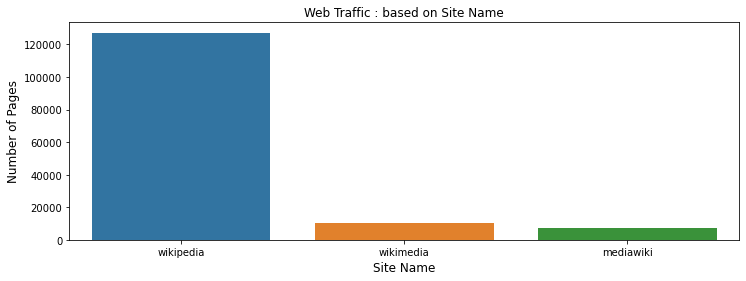

it shows : 
wikipedia has total of 127208 pages.
wikimedia has total of 10555 pages.
mediawiki has total of 7300 pages.


In [22]:
def plot_barplots(data, title, yname, xname):
    plt.figure(figsize=(12,4))
    sns.barplot(data.index, data.values)
    plt.title(title)
    plt.ylabel(yname, fontsize=12)
    plt.xlabel(xname, fontsize=12)
    plt.show()
    
data_counts  = pageData['Site_Name'].value_counts()
plot_barplots(data_counts, 'Web Traffic : based on Site Name', 'Number of Pages', 'Site Name')
print("it shows : ")
for k, v in data_counts.items():
    print("{0} has total of {1} pages.".format(k, v))

Wikimedia or mediawiki is  part of wikipedia. 

Observations :
    
- Most of the traffic is from Wikipedia.

# Site Language

/Users/prajin/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


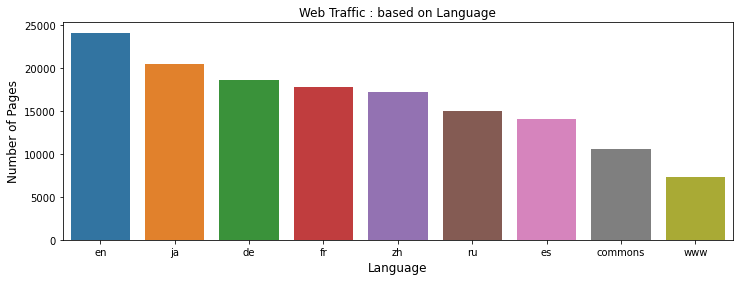

Analysis shows : 
1) en has total of 24108 pages.
2) ja has total of 20431 pages.
3) de has total of 18547 pages.
4) fr has total of 17802 pages.
5) zh has total of 17229 pages.
6) ru has total of 15022 pages.
7) es has total of 14069 pages.
8) commons has total of 10555 pages.
9) www has total of 7300 pages.


In [23]:
data_counts  = pageData['Language'].value_counts()
plot_barplots(data_counts, 'Web Traffic : based on Language', 'Number of Pages', 'Language')
print("Analysis shows : ")
for i, (k, v) in enumerate(data_counts.items()):
    print("{2}) {0} has total of {1} pages.".format(k, v, i+1))

as expected, english wiki has more number of traffic

# Page Access

/Users/prajin/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


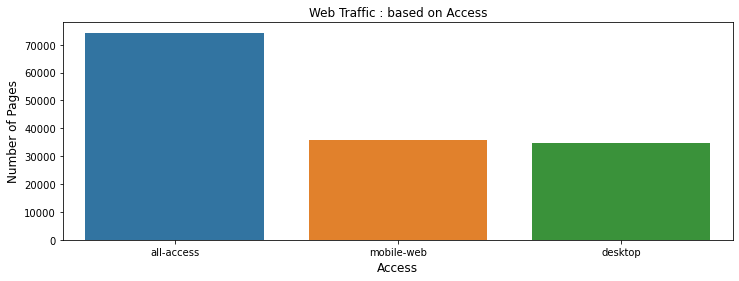

Analysis shows : 
1) all-access has total of 74315 pages.
2) mobile-web has total of 35939 pages.
3) desktop has total of 34809 pages.


In [24]:
data_counts  = pageData['Access'].value_counts()
plot_barplots(data_counts, 'Web Traffic : based on Access', 'Number of Pages', 'Access')
print("Analysis shows : ")
for i, (k, v) in enumerate(data_counts.items()):
    print("{2}) {0} has total of {1} pages.".format(k, v, i+1))



Observation: 

- Page is mainly accessed from Three categories - all-access, Desktop access and Mobile-web.

- More pages are from 'all-access' category compared to that of remaining categories.

- all-access is the summation of other two + other medium access.

# Access Agent

/Users/prajin/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


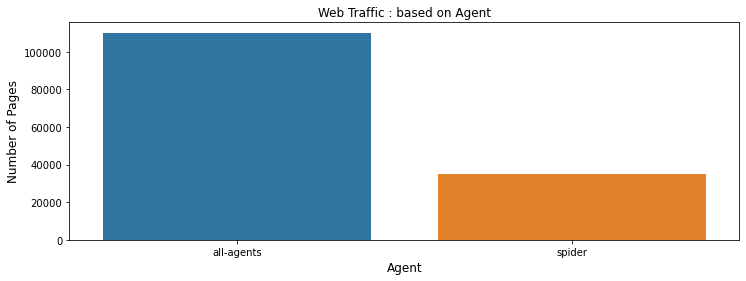

Analysis shows : 
1) all-agents has total of 110150 pages.
2) spider has total of 34913 pages.


In [25]:
data_counts  = pageData['Agent'].value_counts()
plot_barplots(data_counts, 'Web Traffic : based on Agent', 'Number of Pages', 'Agent')
print("Analysis shows : ")
for i, (k, v) in enumerate(data_counts.items()):
    print("{2}) {0} has total of {1} pages.".format(k, v, i+1))

Observation:
- Spider iss web crawl through some bots

# Mean page views

In [26]:
training_data

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
0             18.0        11.0         5.0        13.0        14.0   
1             11.0        14.0        15.0        18.0        11.0   
2              1.0         0.0         1.0         1.0         0.0   
3             35.0        13.0        10.0        94.0         4.0   
4              0.0         0.0         0.0         0.0         0.0   
...            ...         ...         ...         ...         ...   
145058         0.0         0.0         0.0         0.0         0.0   
145059         0.0         0.0         0.0         0.0         0.0   
145060         0.0         0.0         0.0         0.0         0.0   
145061         0.0         0.0         0.0         0.0         0.0   
145062         0.0         0.0         0.0         0.0         0.0   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  \
0              9.0         9.0        22.0        26.0        24.0  ...   
1             13.0        22.0        11.0        10.0         4.0  ...   
2              4.0         0.0         3.0         4.0         4.0  ...   
3             26.0        14.0         9.0        11.0        16.0  ...   
4              0.0         0.0         0.0         0.0         0.0  ...   
...            ...         ...         ...         ...         ...  ...   
145058         0.0         0.0         0.0         0.0         0.0  ...   
145059         0.0         0.0         0.0         0.0         0.0  ...   
145060         0.0         0.0         0.0         0.0         0.0  ...   
145061         0.0         0.0         0.0         0.0         0.0  ...   
145062         0.0         0.0         0.0         0.0         0.0  ...   

        2017-09-01  2017-09-02  2017-09-03  2017-09-04  2017-09-05  \
0             19.0        33.0        33.0        18.0        16.0   
1             32.0        30.0        11.0        19.0        54.0   
2              6.0         6.0         7.0         2.0         4.0   
3              7.0        19.0        19.0         9.0         6.0   
4             16.0        16.0        19.0         9.0        20.0   
...            ...         ...         ...         ...         ...   
145058         0.0         4.0         3.0         6.0         5.0   
145059         4.0         4.0         7.0         5.0         0.0   
145060        11.0        25.0        22.0        47.0        42.0   
145061         4.0         6.0         5.0         1.0         5.0   
145062         2.0        29.0         6.0         5.0         2.0   

        2017-09-06  2017-09-07  2017-09-08  2017-09-09  2017-09-10  
0             27.0        29.0        23.0        54.0        38.0  
1             25.0        26.0        23.0        13.0        81.0  
2              7.0         3.0         4.0         7.0         6.0  
3             16.0        19.0        30.0        38.0         4.0  
4             23.0        28.0        14.0         8.0         7.0  
...            ...         ...         ...         ...         ...  
145058         2.0         4.0         4.0         8.0         2.0  
145059         5.0         5.0         2.0         2.0         4.0  
145060        13.0         9.0        21.0        16.0         6.0  
145061         8.0         2.0         4.0         3.0         3.0  
145062         2.0         7.0         6.0        10.0         3.0  

[145063 rows x 803 columns]

In [27]:
timeseries = training_data.iloc[:, 1:]
timeseries.head()

2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
0        11.0         5.0        13.0        14.0         9.0         9.0   
1        14.0        15.0        18.0        11.0        13.0        22.0   
2         0.0         1.0         1.0         0.0         4.0         0.0   
3        13.0        10.0        94.0         4.0        26.0        14.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-08  2015-07-09  2015-07-10  2015-07-11  ...  2017-09-01  \
0        22.0        26.0        24.0        19.0  ...        19.0   
1        11.0        10.0         4.0        41.0  ...        32.0   
2         3.0         4.0         4.0         1.0  ...         6.0   
3         9.0        11.0        16.0        16.0  ...         7.0   
4         0.0         0.0         0.0         0.0  ...        16.0   

   2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0        33.0        33.0        18.0        16.0        27.0        29.0   
1        30.0        11.0        19.0        54.0        25.0        26.0   
2         6.0         7.0         2.0         4.0         7.0         3.0   
3        19.0        19.0         9.0         6.0        16.0        19.0   
4        16.0        19.0         9.0        20.0        23.0        28.0   

   2017-09-08  2017-09-09  2017-09-10  
0        23.0        54.0        38.0  
1        23.0        13.0        81.0  
2         4.0         7.0         6.0  
3        30.0        38.0         4.0  
4        14.0         8.0         7.0  

[5 rows x 802 columns]

In [28]:
mean = timeseries.mean(axis=0)
mean

2015-07-02    1031.251727
2015-07-03     973.138768
2015-07-04    1003.810839
2015-07-05    1044.361908
2015-07-06    1108.106188
                 ...     
2017-09-06    1192.459890
2017-09-07    1250.224337
2017-09-08     947.043023
2017-09-09     916.763558
2017-09-10    1031.082730
Length: 802, dtype: float64

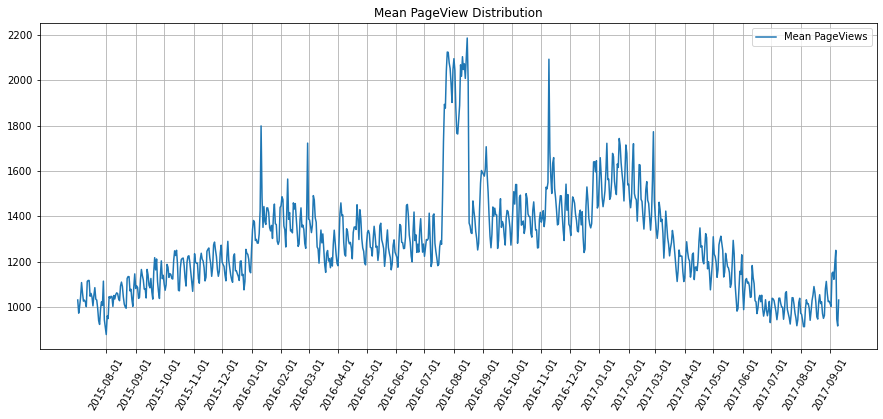

In [29]:
ticks      = [ x for x in list(enumerate(mean.index)) if x[1].endswith('01') ]
ticklabel  = [ x[1] for x in ticks ]
tickloc    = [ x[0] for x in ticks ]
fig = plt.figure(figsize=(15, 6))
plt.title('Mean PageView Distribution')
b1 = plt.plot(np.arange(len(mean.index)), mean)
plt.xticks(tickloc, ticklabel, rotation=60)
plt.legend([b1[0]], ['Mean PageViews'])
plt.grid()
plt.show()

In [30]:
# It seems data is stationery overtime

#  co-relation with laggged value 

#### Auto-coreation with Mean Page Views

In [31]:
days = len(mean)
days

802

/Users/prajin/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


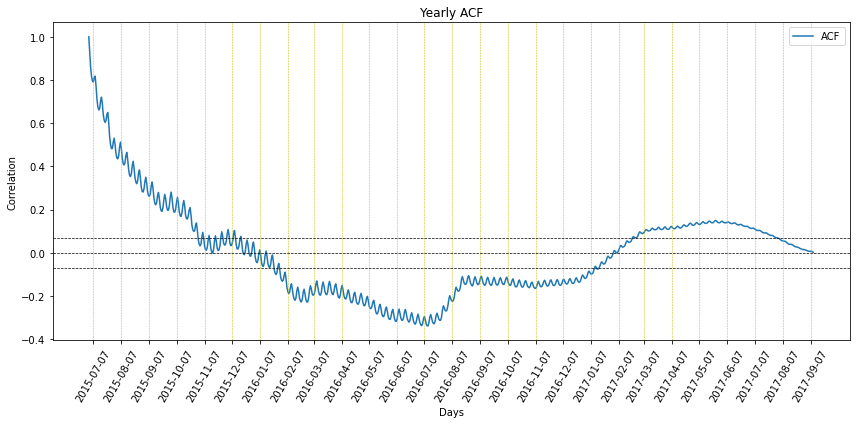

In [32]:
days = len(mean)

ticks      = [ x for x in list(enumerate(mean.index))[:days] if x[1].endswith('07') ]
ticklabel  = [ x[1] for x in ticks ]
tickloc    = [ x[0] for x in ticks ]

plt.figure(figsize=(12,6))
acf_plot   = acf((mean.values), nlags=days)
plt.title('Yearly ACF')
plt.xlabel('Days')
plt.ylabel('Correlation')
plt.plot(np.arange(len(acf_plot)), acf_plot, ls='-')

plt.xticks(tickloc, ticklabel, rotation=60)
plt.legend(['ACF'])
[plt.axvline(x=p, color='y', ls='--', lw=0.5) for p in tickloc]
plt.axhline(y=0,ls='--',lw=0.7, color='black')
plt.axhline(y=-1.96/np.sqrt(days),ls='--',lw=0.7, color='black')
plt.axhline(y=1.96/np.sqrt(days),ls='--' ,lw=0.7, color='black')

plt.tight_layout()
plt.show()


Observations :

1. Here we see that the page_views are strongly co-rleated with the previous values

In [33]:
# Lets plot with different lag values to understand co-relation in depth

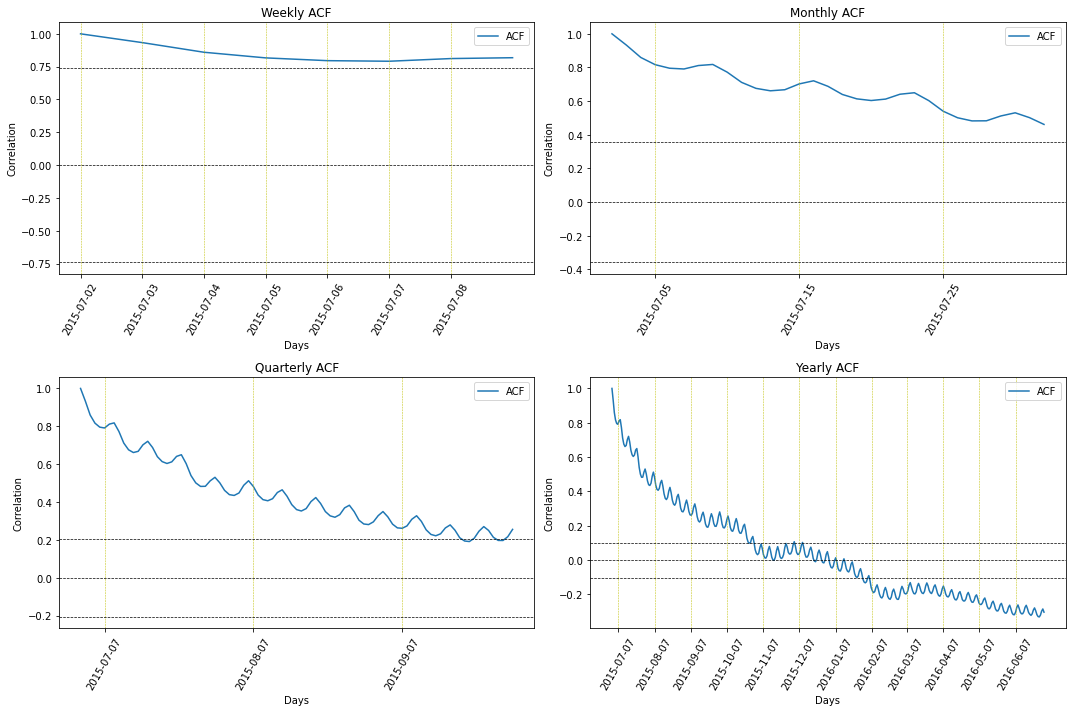

In [34]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15, 10))


days = 7 # weekly
ticks      = [ x for x in list(enumerate(mean.index))[:days] ]
ticklabel  = [ x[1] for x in ticks ]
tickloc    = [ x[0] for x in ticks ]
plt.subplot(221)
acf_plot   = acf((mean.values), nlags=days)
plt.title('Weekly ACF')
plt.xlabel('Days')
plt.ylabel('Correlation')
plt.plot(np.arange(len(acf_plot)), acf_plot, ls='-')
plt.xticks(tickloc, ticklabel, rotation=60)
plt.legend(['ACF'])
[plt.axvline(x=p, color='y', ls='--', lw=0.5) for p in tickloc]
plt.axhline(y=0,ls='--',lw=0.7, color='black')
plt.axhline(y=-1.96/np.sqrt(days),ls='--',lw=0.7, color='black')
plt.axhline(y=1.96/np.sqrt(days),ls='--' ,lw=0.7, color='black')


days = 30 # Monthly

ticks      = [ x for x in list(enumerate(mean.index))[:days] if x[1].endswith('5') ]
ticklabel  = [ x[1] for x in ticks ]
tickloc    = [ x[0] for x in ticks ]
plt.subplot(222)
acf_plot   = acf((mean.values), nlags=days)
plt.title('Monthly ACF')
plt.xlabel('Days')
plt.ylabel('Correlation')
plt.plot(np.arange(len(acf_plot)), acf_plot, ls='-')
plt.xticks(tickloc, ticklabel, rotation=60)
plt.legend(['ACF'])
[plt.axvline(x=p, color='y', ls='--', lw=0.5) for p in tickloc]
plt.axhline(y=0,ls='--',lw=0.7, color='black')
plt.axhline(y=-1.96/np.sqrt(days),ls='--',lw=0.7, color='black')
plt.axhline(y=1.96/np.sqrt(days),ls='--' ,lw=0.7, color='black')


days = 90 

ticks      = [ x for x in list(enumerate(mean.index))[:days] if x[1].endswith('07') ]
ticklabel  = [ x[1] for x in ticks ]
tickloc    = [ x[0] for x in ticks ]
plt.subplot(223)
acf_plot   = acf((mean.values), nlags=days)
plt.title('Quarterly ACF')
plt.xlabel('Days')
plt.ylabel('Correlation')
plt.plot(np.arange(len(acf_plot)), acf_plot, ls='-')
plt.xticks(tickloc, ticklabel, rotation=60)
plt.legend(['ACF'])
[plt.axvline(x=p, color='y', ls='--', lw=0.5) for p in tickloc]
plt.axhline(y=0,ls='--',lw=0.7, color='black')
plt.axhline(y=-1.96/np.sqrt(days),ls='--',lw=0.7, color='black')
plt.axhline(y=1.96/np.sqrt(days),ls='--' ,lw=0.7, color='black')


days = 365 # Yearly

ticks      = [ x for x in list(enumerate(mean.index))[:days] if x[1].endswith('07') ]
ticklabel  = [ x[1] for x in ticks ]
tickloc    = [ x[0] for x in ticks ]
plt.subplot(224)
acf_plot   = acf((mean.values), nlags=days)
plt.title('Yearly ACF')
plt.xlabel('Days')
plt.ylabel('Correlation')
plt.plot(np.arange(len(acf_plot)), acf_plot, ls='-')

plt.xticks(tickloc, ticklabel, rotation=60)
plt.legend(['ACF'])
[plt.axvline(x=p, color='y', ls='--', lw=0.5) for p in tickloc]
plt.axhline(y=0,ls='--',lw=0.7, color='black')
plt.axhline(y=-1.96/np.sqrt(days),ls='--',lw=0.7, color='black')
plt.axhline(y=1.96/np.sqrt(days),ls='--' ,lw=0.7, color='black')

plt.tight_layout()
plt.show()


Observations :

1. These plot shows that, the MeanPageviews is co-related with its lagged values, high co-relation with Weekly, Monthly and Quarterly lags not much with the Yearly 

In [35]:
mean

2015-07-02    1031.251727
2015-07-03     973.138768
2015-07-04    1003.810839
2015-07-05    1044.361908
2015-07-06    1108.106188
                 ...     
2017-09-06    1192.459890
2017-09-07    1250.224337
2017-09-08     947.043023
2017-09-09     916.763558
2017-09-10    1031.082730
Length: 802, dtype: float64

<AxesSubplot:>

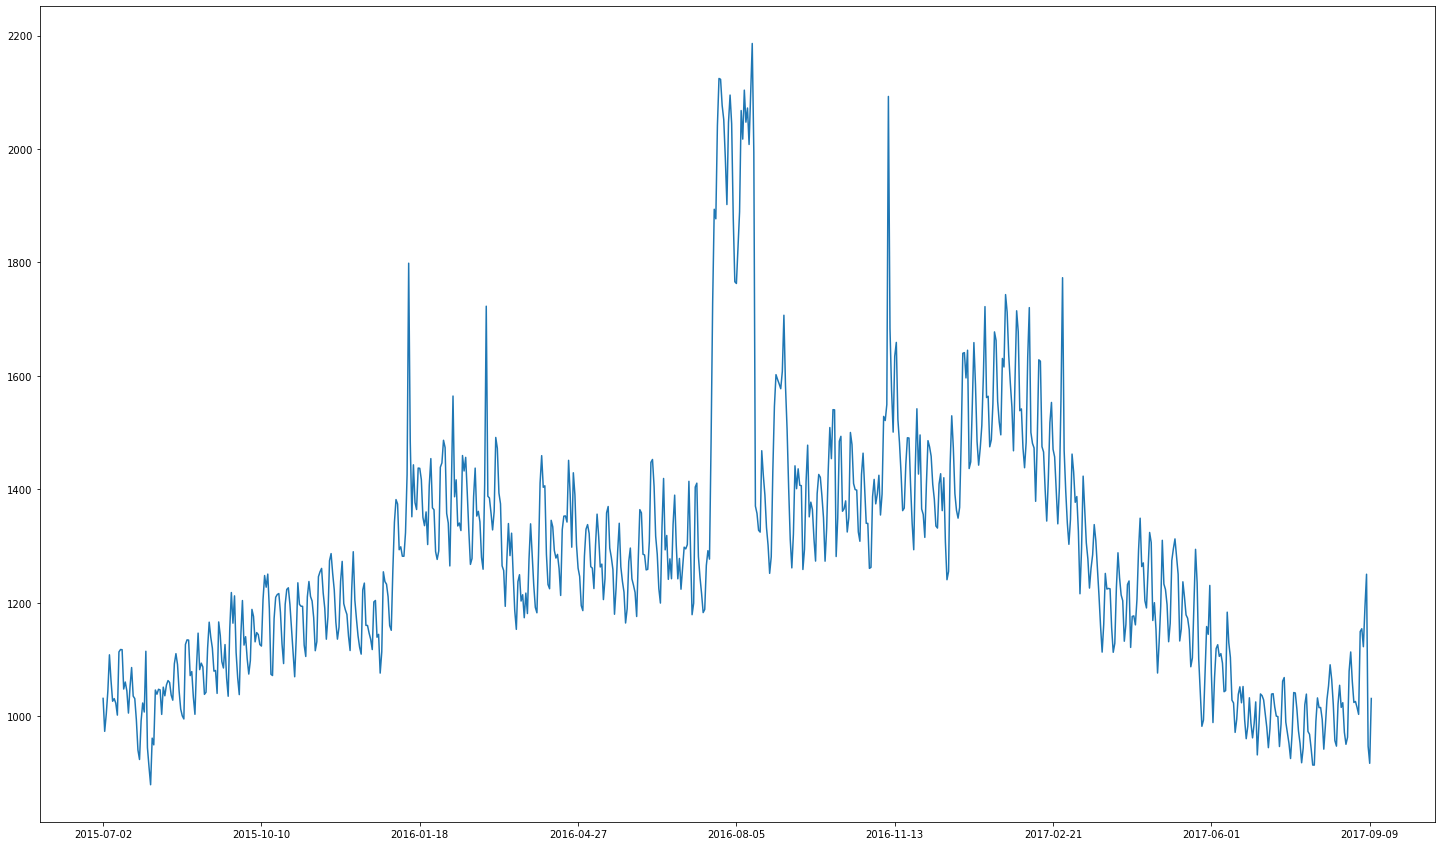

In [36]:
result = seasonal_decompose(mean, model='multiplicative', freq=365)
trend_comp    = result.trend
seasonal_comp = result.seasonal
residual_comp = result.resid
observed_val  = result.observed


result.observed.plot(figsize=(25,15))

<AxesSubplot:>

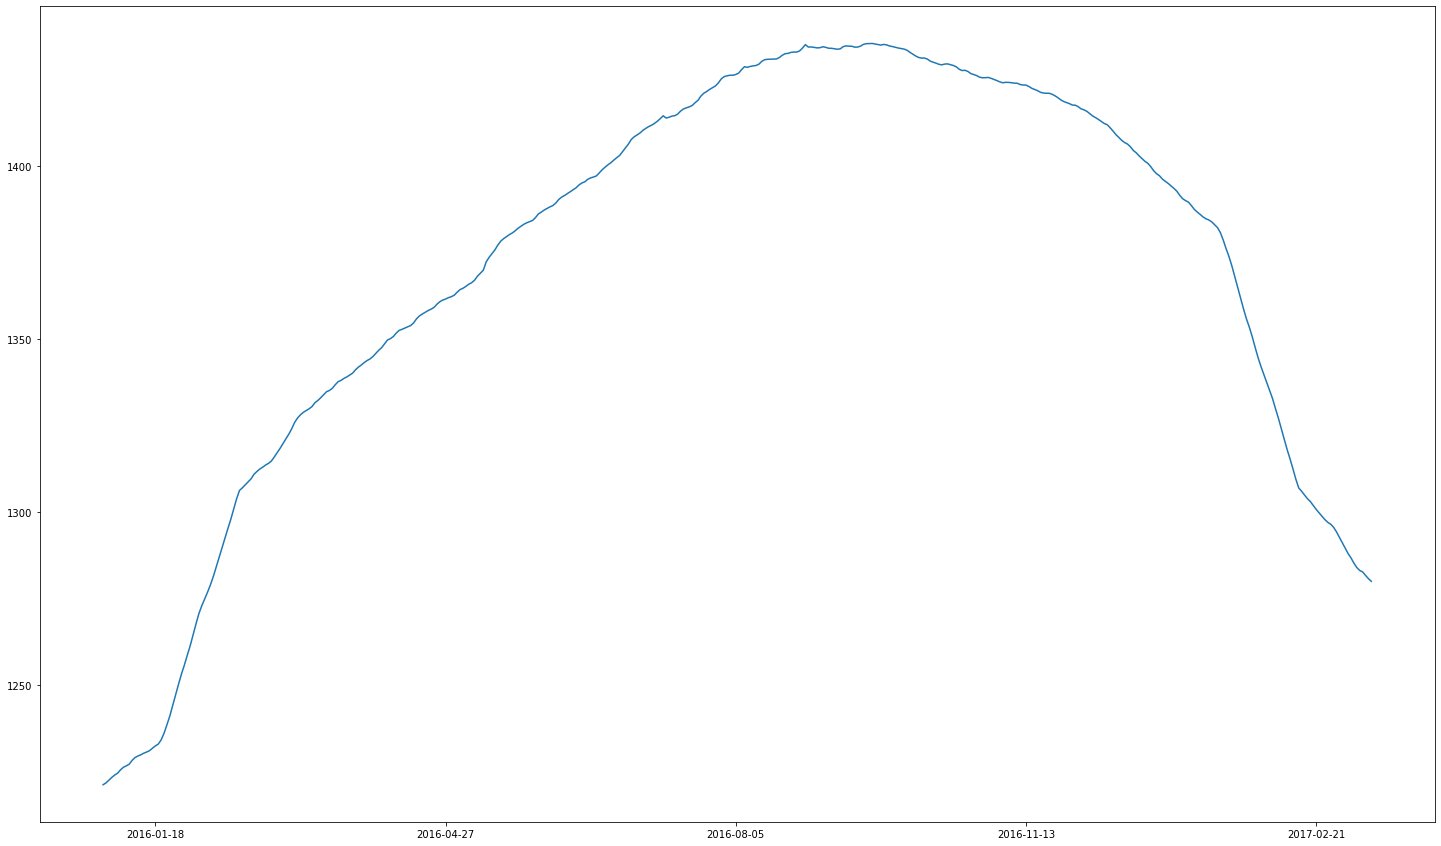

In [37]:
result.trend.plot(figsize=(25,15))

<AxesSubplot:>

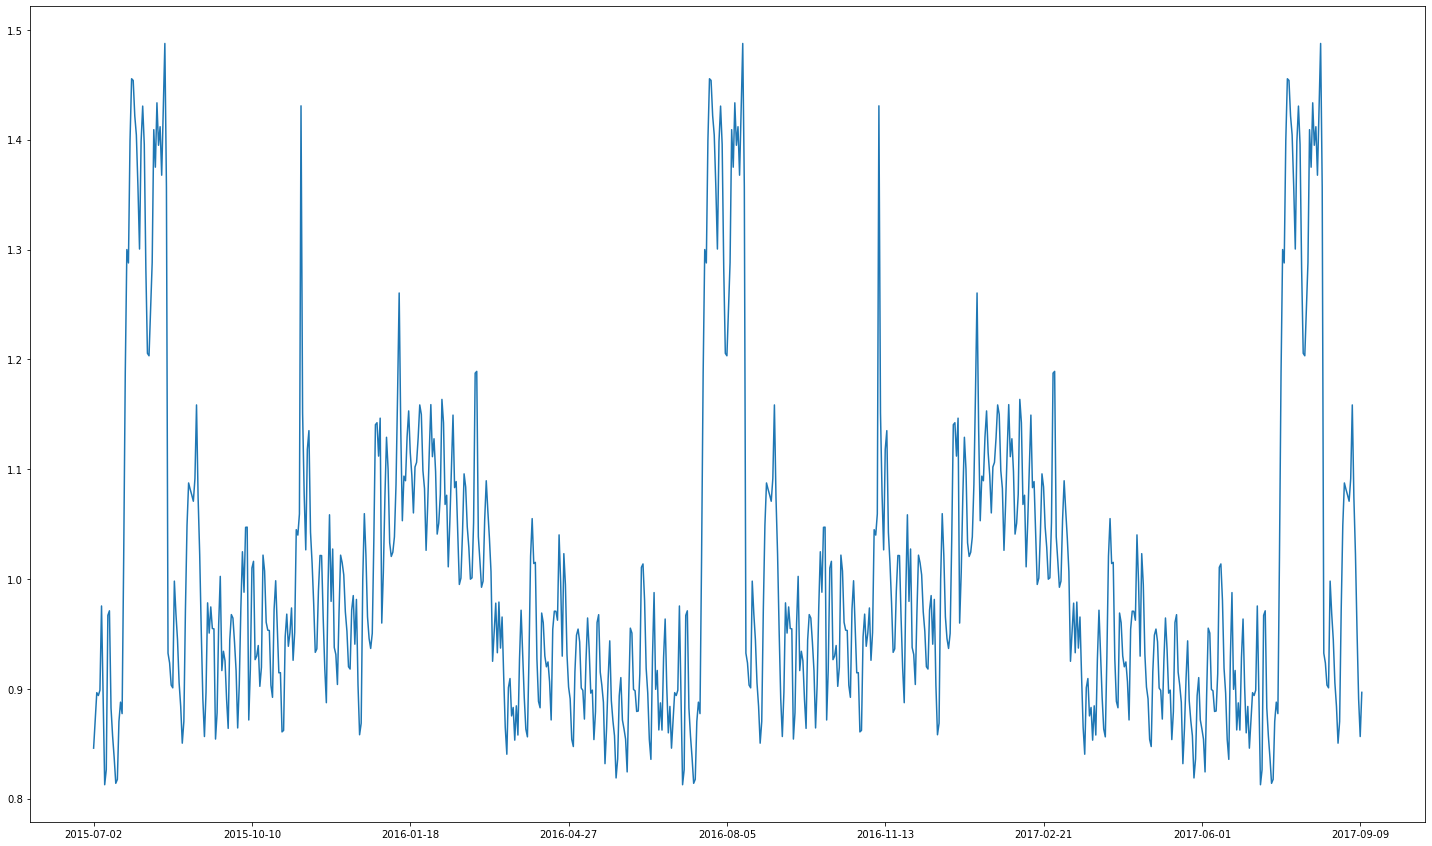

In [38]:
result.seasonal.plot(figsize=(25,15))

# Rolling Mean

Rolling Statistics is mainly used to check the volatility in the data over the time interval


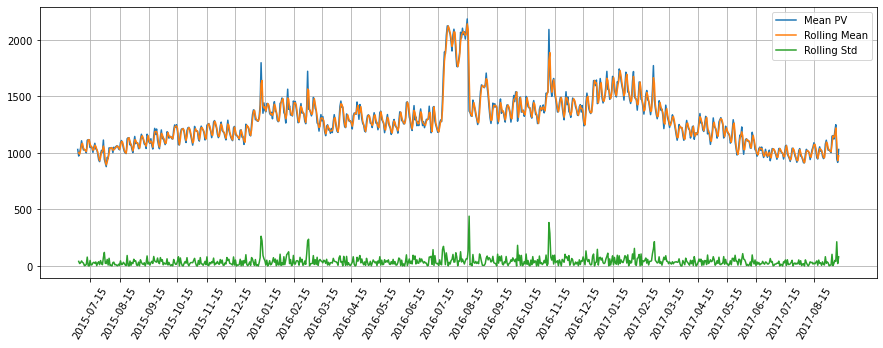

In [39]:

wndw = 2
plt.figure(figsize=(15,5))
b1 = plt.plot(mean)
b2 = plt.plot(mean.rolling(window=wndw).mean().dropna())
b3 = plt.plot(mean.rolling(window=wndw).std().dropna())

ticks      = [ x for x in list(enumerate(mean.index))[:] if x[1].endswith('15') ]
ticklabel  = [ x[1] for x in ticks ]
tickloc    = [ x[0] for x in ticks ]
plt.xticks(tickloc, ticklabel, rotation=60)
plt.legend([b1[0], b2[0], b3[0]], ['Mean PV', 'Rolling Mean', 'Rolling Std'])
plt.grid()
plt.show()

In [40]:
# Change window size for bbetter analysis

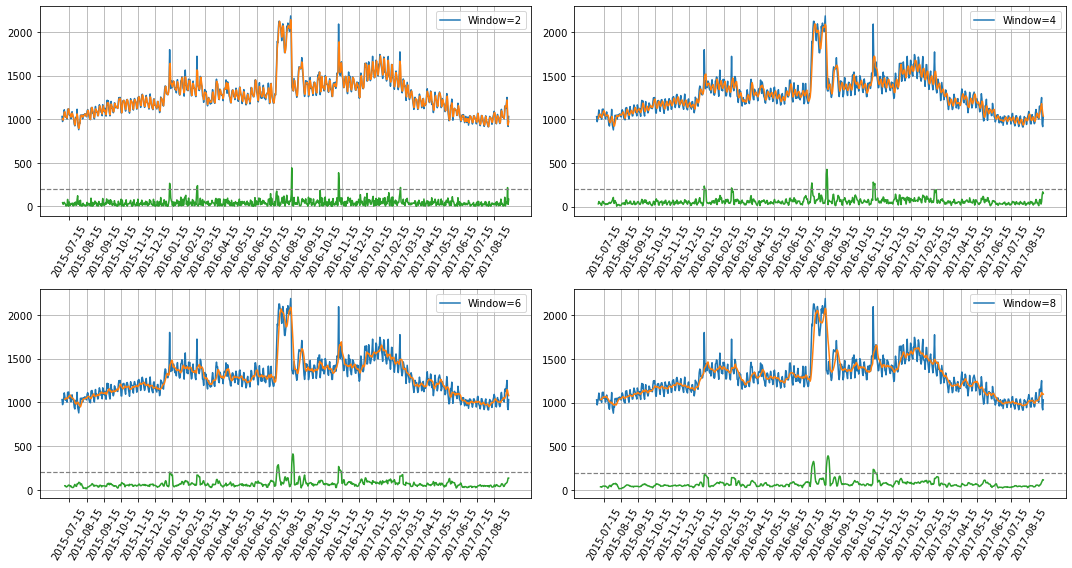

In [41]:
plt.figure(figsize=(15, 8))

plt.subplot(221)
b1 = plt.plot(mean)
b2 = plt.plot(mean.rolling(window=2).mean().dropna())
b3 = plt.plot(mean.rolling(window=2).std().dropna())
plt.axhline(y=200, ls='--', color='gray', lw=1.2)
plt.xticks(tickloc, ticklabel, rotation=60)
plt.grid()
plt.legend(['Window=2'])

plt.subplot(222)
b1 = plt.plot(mean)
b2 = plt.plot(mean.rolling(window=4).mean().dropna())
b3 = plt.plot(mean.rolling(window=4).std().dropna())
plt.axhline(y=200, ls='--', color='gray', lw=1.2)
plt.xticks(tickloc, ticklabel, rotation=60)
plt.grid()
plt.legend(['Window=4'])

plt.subplot(223)
b1 = plt.plot(mean)
b2 = plt.plot(mean.rolling(window=6).mean().dropna())
b3 = plt.plot(mean.rolling(window=6).std().dropna())
plt.axhline(y=200, ls='--', color='gray', lw=1.2)
plt.xticks(tickloc, ticklabel, rotation=60)
plt.grid()
plt.legend(['Window=6'])

plt.subplot(224)
b1 = plt.plot(mean)
b2 = plt.plot(mean.rolling(window=8).mean().dropna())
b3 = plt.plot(mean.rolling(window=8).std().dropna())
plt.axhline(y=200, ls='--', color='gray', lw=1.2)
plt.xticks(tickloc, ticklabel, rotation=60)
plt.grid()
plt.legend(['Window=8'])

plt.tight_layout()
plt.show()

# Site Name

##### Since there are multiple languages, the pattern for them might be different. 

# Basesd on Countries

In [88]:
lang=set()
for k in Page_name:
    index=k.find('.wikipedia')
    lang.add(k[index-1:index-3:-1][::-1])
print(lang)

{'ja', 'es', 'zh', 'en', 'de', 'nt', 'fr', 'ru'}


In [89]:
print(training_data.shape)

(145063, 803)


In [90]:
from operator import add
lang_list=list(lang)
data_list=[]
for i in range(len(lang_list)):
    data_list.append(np.zeros(training_data.shape[1]-1))

for i in range(len(Page_name)):
    index=Page_name[i].find('.wikipedia')
    temp=lang_list.index(Page_name[i][index-1:index-3:-1][::-1])
    add_list=training_data.iloc[i].values[1:]
    data_list[temp]=list(map(add,data_list[temp],add_list))

In [91]:
lang_data=pd.DataFrame(data_list,index=lang_list,columns=training_data.columns.values[1:])
lang_data.head(10)

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
ja  1.128760e+07  1.203762e+07  1.466282e+07  1.354959e+07  1.231640e+07   
es  1.447854e+07  1.323938e+07  1.158071e+07  1.324348e+07  1.499429e+07   
zh  4.027228e+06  4.000698e+06  4.007034e+06  4.157697e+06  4.261685e+06   
en  8.390644e+07  7.999623e+07  7.790062e+07  8.534586e+07  9.067729e+07   
de  1.304213e+07  1.257711e+07  1.140957e+07  1.318679e+07  1.457950e+07   
nt  1.488601e+06  1.402922e+06  1.193326e+06  1.293270e+06  1.519369e+06   
fr  8.399593e+06  8.122398e+06  8.444826e+06  8.385321e+06  8.681844e+06   
ru  9.549539e+06  8.791506e+06  8.232351e+06  8.834249e+06  9.541302e+06   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
ja  1.178043e+07  1.237519e+07  1.187347e+07  1.200008e+07  1.277514e+07  ...   
es  1.471997e+07  1.466638e+07  1.431875e+07  1.317287e+07  1.177085e+07  ...   
zh  4.345383e+06  4.363645e+06  4.382483e+06  4.524495e+06  4.274008e+06  ...   
en  8.721428e+07  8.260403e+07  8.466588e+07  8.408929e+07  8.288829e+07  ...   
de  1.425975e+07  1.441146e+07  1.391457e+07  1.293948e+07  1.168549e+07  ...   
nt  1.583107e+06  1.609608e+06  1.488556e+06  1.499427e+06  1.149002e+06  ...   
fr  8.635037e+06  8.380199e+06  8.330442e+06  7.908127e+06  7.817555e+06  ...   
ru  9.400717e+06  9.342492e+06  9.493143e+06  1.070192e+07  9.989442e+06  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
ja  1.103371e+07  1.215090e+07  1.275079e+07  1.166053e+07  1.138325e+07   
es  1.402723e+07  1.153272e+07  1.379618e+07  1.636903e+07  1.744719e+07   
zh  4.758335e+06  5.149796e+06  5.352177e+06  5.049662e+06  4.869940e+06   
en  7.819578e+07  8.338802e+07  9.381745e+07  9.517020e+07  9.175307e+07   
de  1.364213e+07  1.140608e+07  1.207785e+07  1.242473e+07  1.233142e+07   
nt  4.334240e+06  2.523307e+06  3.094987e+06  3.001927e+06  2.720785e+06   
fr  8.761846e+06  8.461573e+06  8.631382e+06  8.012411e+06  7.916483e+06   
ru  9.303069e+06  9.546106e+06  9.931294e+06  9.517563e+06  1.078873e+07   

      2017-09-06    2017-09-07    2017-09-08    2017-09-09    2017-09-10  
ja  1.110485e+07  1.155721e+07  1.162770e+07  1.211515e+07  1.349511e+07  
es  1.676325e+07  1.643519e+07  1.321035e+07  1.121379e+07  1.314095e+07  
zh  4.813088e+06  5.006207e+06  4.855087e+06  5.155225e+06  5.303388e+06  
en  8.663585e+07  9.640576e+07  7.432060e+07  7.067735e+07  8.058266e+07  
de  1.234592e+07  1.407322e+07  1.176529e+07  1.092976e+07  1.193562e+07  
nt  2.691787e+06  2.622111e+06  2.258583e+06  2.450317e+06  2.185776e+06  
fr  8.711322e+06  8.850837e+06  7.800922e+06  8.394442e+06  8.768072e+06  
ru  1.134399e+07  1.031676e+07  9.186290e+06  9.004170e+06  1.003829e+07  

[8 rows x 802 columns]

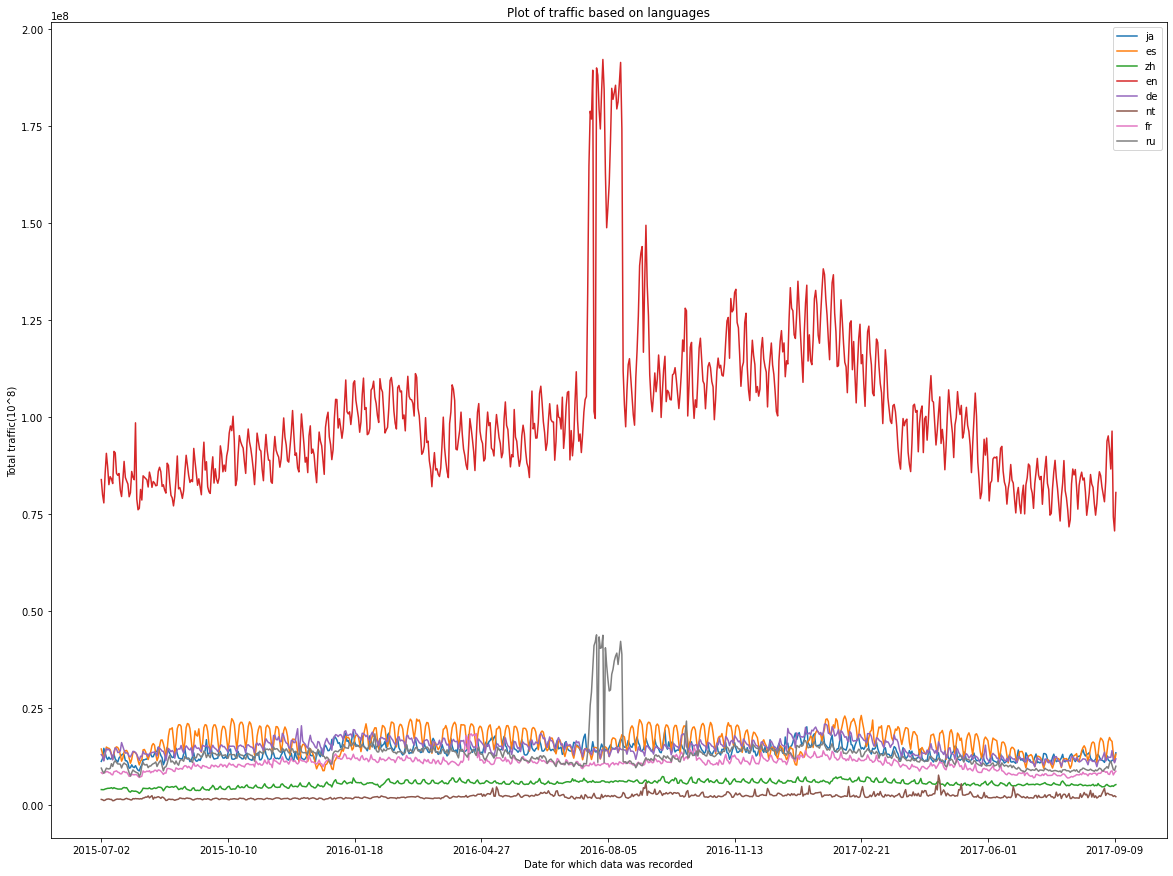

In [92]:
lang_data.transpose().plot(figsize=(20,15),title='Plot of traffic based on languages')
plt.xlabel('Date for which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()

Observations:
    
1. English language wikipedia has the largest traffic. 
2. In 2016 there is a spike both in English and in Russian. 



In [93]:
lang_data

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
ja  1.128760e+07  1.203762e+07  1.466282e+07  1.354959e+07  1.231640e+07   
es  1.447854e+07  1.323938e+07  1.158071e+07  1.324348e+07  1.499429e+07   
zh  4.027228e+06  4.000698e+06  4.007034e+06  4.157697e+06  4.261685e+06   
en  8.390644e+07  7.999623e+07  7.790062e+07  8.534586e+07  9.067729e+07   
de  1.304213e+07  1.257711e+07  1.140957e+07  1.318679e+07  1.457950e+07   
nt  1.488601e+06  1.402922e+06  1.193326e+06  1.293270e+06  1.519369e+06   
fr  8.399593e+06  8.122398e+06  8.444826e+06  8.385321e+06  8.681844e+06   
ru  9.549539e+06  8.791506e+06  8.232351e+06  8.834249e+06  9.541302e+06   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
ja  1.178043e+07  1.237519e+07  1.187347e+07  1.200008e+07  1.277514e+07  ...   
es  1.471997e+07  1.466638e+07  1.431875e+07  1.317287e+07  1.177085e+07  ...   
zh  4.345383e+06  4.363645e+06  4.382483e+06  4.524495e+06  4.274008e+06  ...   
en  8.721428e+07  8.260403e+07  8.466588e+07  8.408929e+07  8.288829e+07  ...   
de  1.425975e+07  1.441146e+07  1.391457e+07  1.293948e+07  1.168549e+07  ...   
nt  1.583107e+06  1.609608e+06  1.488556e+06  1.499427e+06  1.149002e+06  ...   
fr  8.635037e+06  8.380199e+06  8.330442e+06  7.908127e+06  7.817555e+06  ...   
ru  9.400717e+06  9.342492e+06  9.493143e+06  1.070192e+07  9.989442e+06  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
ja  1.103371e+07  1.215090e+07  1.275079e+07  1.166053e+07  1.138325e+07   
es  1.402723e+07  1.153272e+07  1.379618e+07  1.636903e+07  1.744719e+07   
zh  4.758335e+06  5.149796e+06  5.352177e+06  5.049662e+06  4.869940e+06   
en  7.819578e+07  8.338802e+07  9.381745e+07  9.517020e+07  9.175307e+07   
de  1.364213e+07  1.140608e+07  1.207785e+07  1.242473e+07  1.233142e+07   
nt  4.334240e+06  2.523307e+06  3.094987e+06  3.001927e+06  2.720785e+06   
fr  8.761846e+06  8.461573e+06  8.631382e+06  8.012411e+06  7.916483e+06   
ru  9.303069e+06  9.546106e+06  9.931294e+06  9.517563e+06  1.078873e+07   

      2017-09-06    2017-09-07    2017-09-08    2017-09-09    2017-09-10  
ja  1.110485e+07  1.155721e+07  1.162770e+07  1.211515e+07  1.349511e+07  
es  1.676325e+07  1.643519e+07  1.321035e+07  1.121379e+07  1.314095e+07  
zh  4.813088e+06  5.006207e+06  4.855087e+06  5.155225e+06  5.303388e+06  
en  8.663585e+07  9.640576e+07  7.432060e+07  7.067735e+07  8.058266e+07  
de  1.234592e+07  1.407322e+07  1.176529e+07  1.092976e+07  1.193562e+07  
nt  2.691787e+06  2.622111e+06  2.258583e+06  2.450317e+06  2.185776e+06  
fr  8.711322e+06  8.850837e+06  7.800922e+06  8.394442e+06  8.768072e+06  
ru  1.134399e+07  1.031676e+07  9.186290e+06  9.004170e+06  1.003829e+07  

[8 rows x 802 columns]

# Plots for Different Language

# Spanish

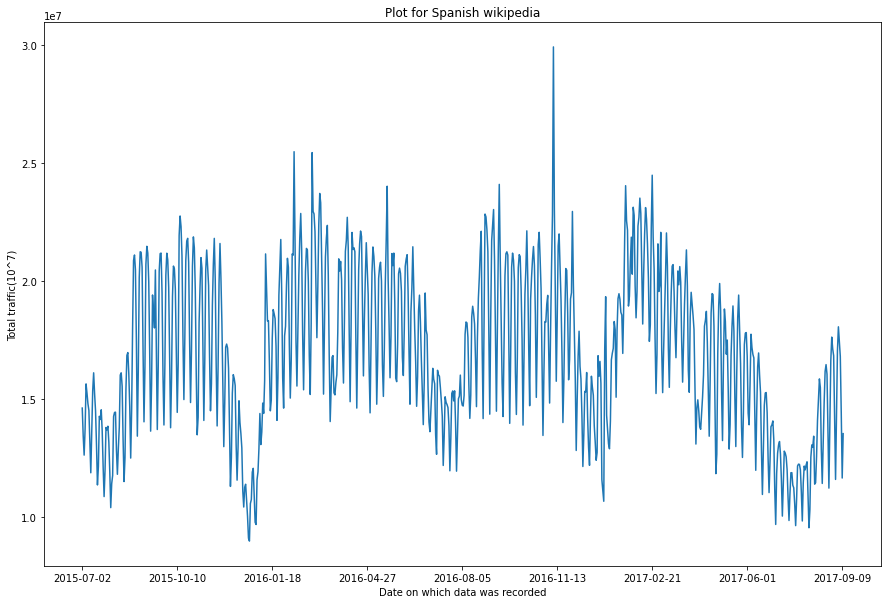

In [48]:
lang_data.iloc[2].transpose().plot(figsize=(15,10),title='Plot for Spanish wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

# dd


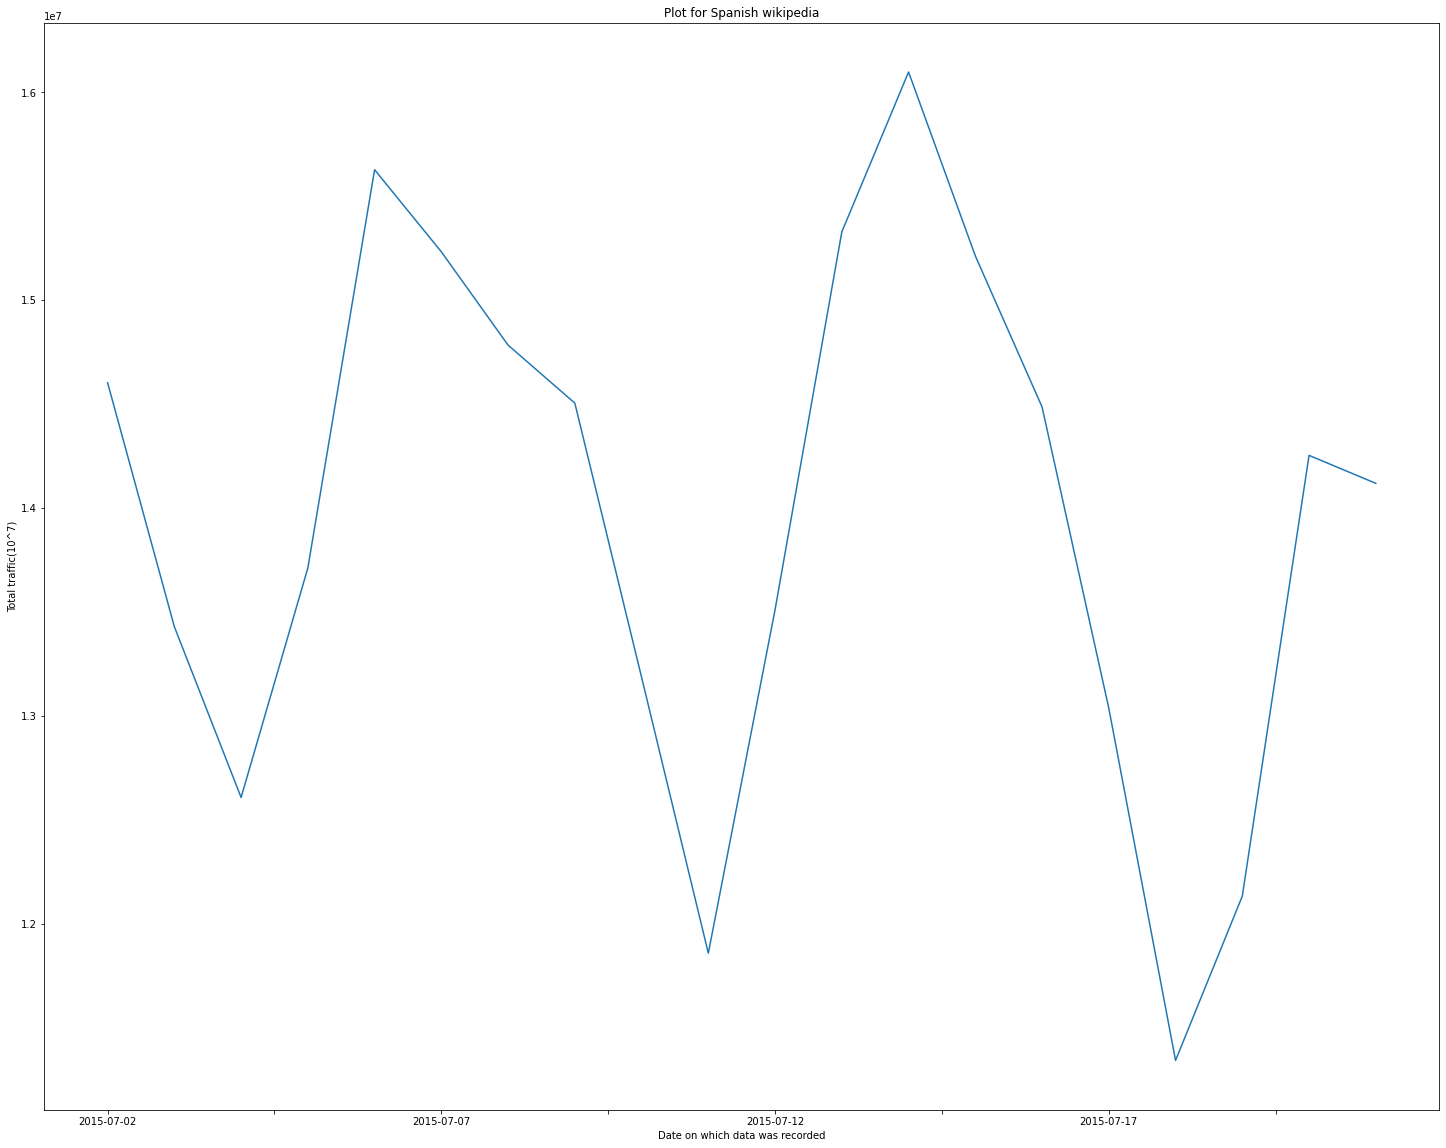

In [49]:
lang_data.iloc[2][0:20].transpose().plot(figsize=(25,20),title='Plot for Spanish wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()


Observation :
    
1. There is a weekly pattern in the data.
2. Usually Traffic goes down during late Q3 or early Q4 

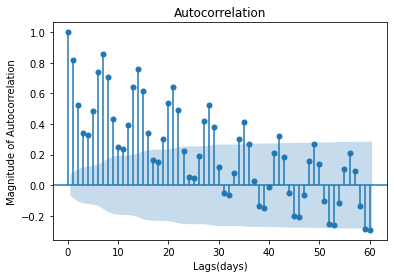

In [50]:
x=plot_acf(lang_data.transpose().es,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

Also shows high co-relation value for 7 days lag.
Using 7 lags will be helpful.

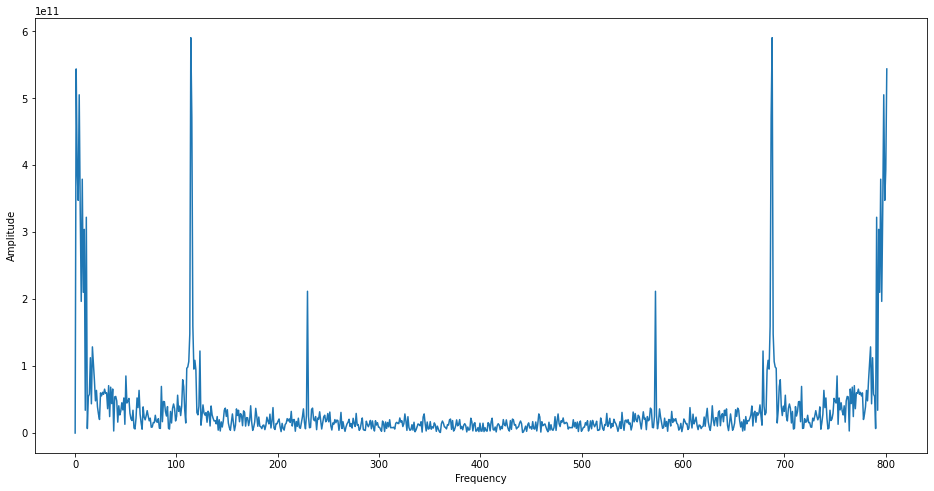

In [51]:
from scipy import fft
data=lang_data.transpose().es.values[1:]
data=data-np.mean(data) 
freq=np.linspace(0,801,801)
y=803*np.abs(x[0:803]) 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

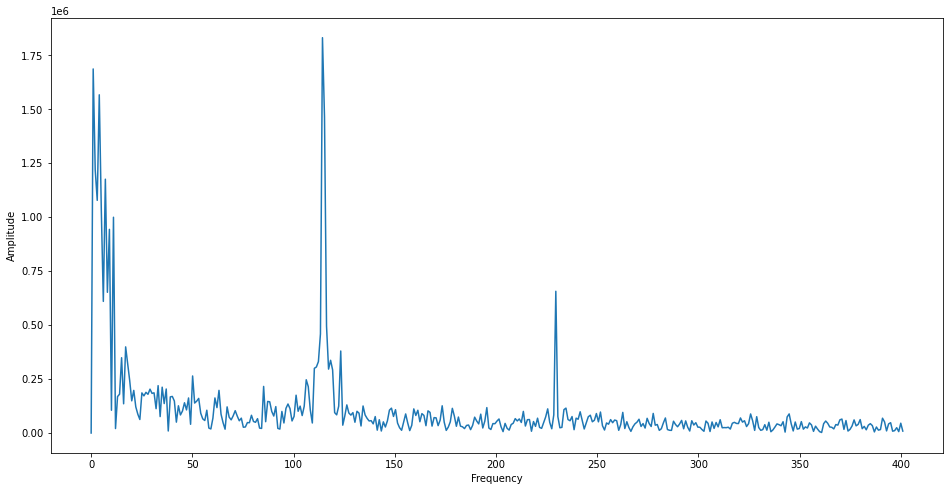

In [52]:
from scipy import fft
data=lang_data.transpose().es.values[1:]
data=data-np.mean(data) 
x=fft.fft(data) 
freq=np.linspace(0,803//2,803//2)
y=2/803*np.abs(x[0:803//2]) 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

The peak shows at 120 , 230, 360 which shows the quaterly periodicity. 
Which means there is quarleteryl seasonality in the data

# English

In [53]:
lang_data

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
fr  8.512987e+06  8.186089e+06  8.749959e+06  8.590587e+06  8.949916e+06   
nt  1.500411e+06  1.415762e+06  1.208134e+06  1.319721e+06  1.530057e+06   
es  1.460121e+07  1.342790e+07  1.260681e+07  1.371046e+07  1.562568e+07   
en  8.443924e+07  8.016843e+07  8.346406e+07  8.619962e+07  9.281031e+07   
ru  9.627679e+06  8.923491e+06  8.393279e+06  8.938585e+06  9.629063e+06   
zh  4.151692e+06  4.123910e+06  4.163694e+06  4.441489e+06  4.464567e+06   
de  1.314242e+07  1.261541e+07  1.157352e+07  1.347039e+07  1.481479e+07   
ja  1.362082e+07  1.230543e+07  1.545635e+07  1.482743e+07  1.292083e+07   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
fr  8.651196e+06  8.492320e+06  8.403705e+06  7.930772e+06  7.859564e+06  ...   
nt  1.645994e+06  1.664654e+06  1.490766e+06  1.502152e+06  1.153058e+06  ...   
es  1.523094e+07  1.478218e+07  1.450318e+07  1.318474e+07  1.185776e+07  ...   
en  8.783948e+07  8.288130e+07  8.480002e+07  8.432071e+07  8.479054e+07  ...   
ru  9.408504e+06  9.364151e+06  9.592358e+06  1.098494e+07  1.011422e+07  ...   
zh  4.459718e+06  4.576112e+06  4.548169e+06  4.728224e+06  4.412121e+06  ...   
de  1.434800e+07  1.461195e+07  1.402002e+07  1.307500e+07  1.206361e+07  ...   
ja  1.256921e+07  1.249331e+07  1.217882e+07  1.265359e+07  1.306822e+07  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
fr  8.905846e+06  8.498777e+06  9.048521e+06  8.177243e+06  7.986859e+06   
nt  4.345884e+06  2.541452e+06  3.143460e+06  3.021847e+06  2.723707e+06   
es  1.416267e+07  1.157611e+07  1.422620e+07  1.704043e+07  1.804609e+07   
en  7.844837e+07  8.367547e+07  9.868326e+07  9.967289e+07  9.324506e+07   
ru  9.709236e+06  9.632897e+06  9.969264e+06  9.605905e+06  1.164126e+07   
zh  4.769573e+06  5.226684e+06  5.512358e+06  5.075714e+06  5.124686e+06   
de  1.377195e+07  1.161139e+07  1.282334e+07  1.290129e+07  1.256124e+07   
ja  1.319893e+07  1.274817e+07  1.328627e+07  1.192526e+07  1.149007e+07   

      2017-09-06    2017-09-07  2017-09-08  2017-09-09  2017-09-10  
fr  9.226393e+06  9.071040e+06   8008422.0   8448785.0   9115857.0  
nt  6.745965e+06  1.045159e+07   2381036.5   2451720.0   2191754.0  
es  1.741019e+07  1.678652e+07  14396144.0  11635459.0  13516893.0  
en  9.310337e+07  9.794220e+07  74657049.0  72158912.5  82675404.0  
ru  1.513207e+07  1.062166e+07   9195616.0   9359213.0  10230383.0  
zh  5.000526e+06  5.212388e+06   5026137.0   5251234.0   5466627.0  
de  1.452796e+07  1.817293e+07  11885967.5  11045738.5  12297360.0  
ja  1.183533e+07  1.310296e+07  11830530.0  12637410.0  14077676.0  

[8 rows x 802 columns]

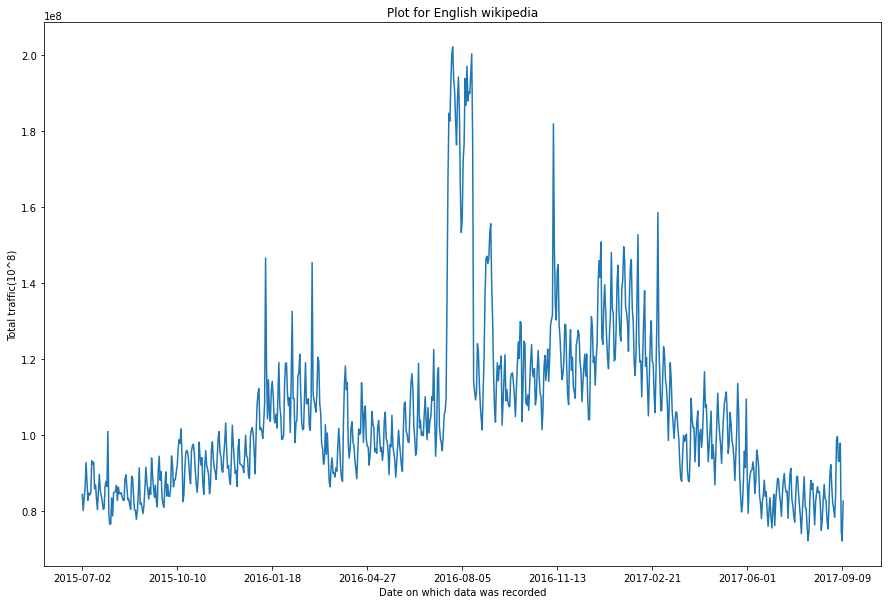

In [54]:
lang_data.iloc[3].transpose().plot(figsize=(15,10),title='Plot for English wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()

For the first few months there are only 1 or 2 spikes in the data but after that spikes can be seen regularly and we can see that after Feb 2017, traffic has gone down by a large margin.

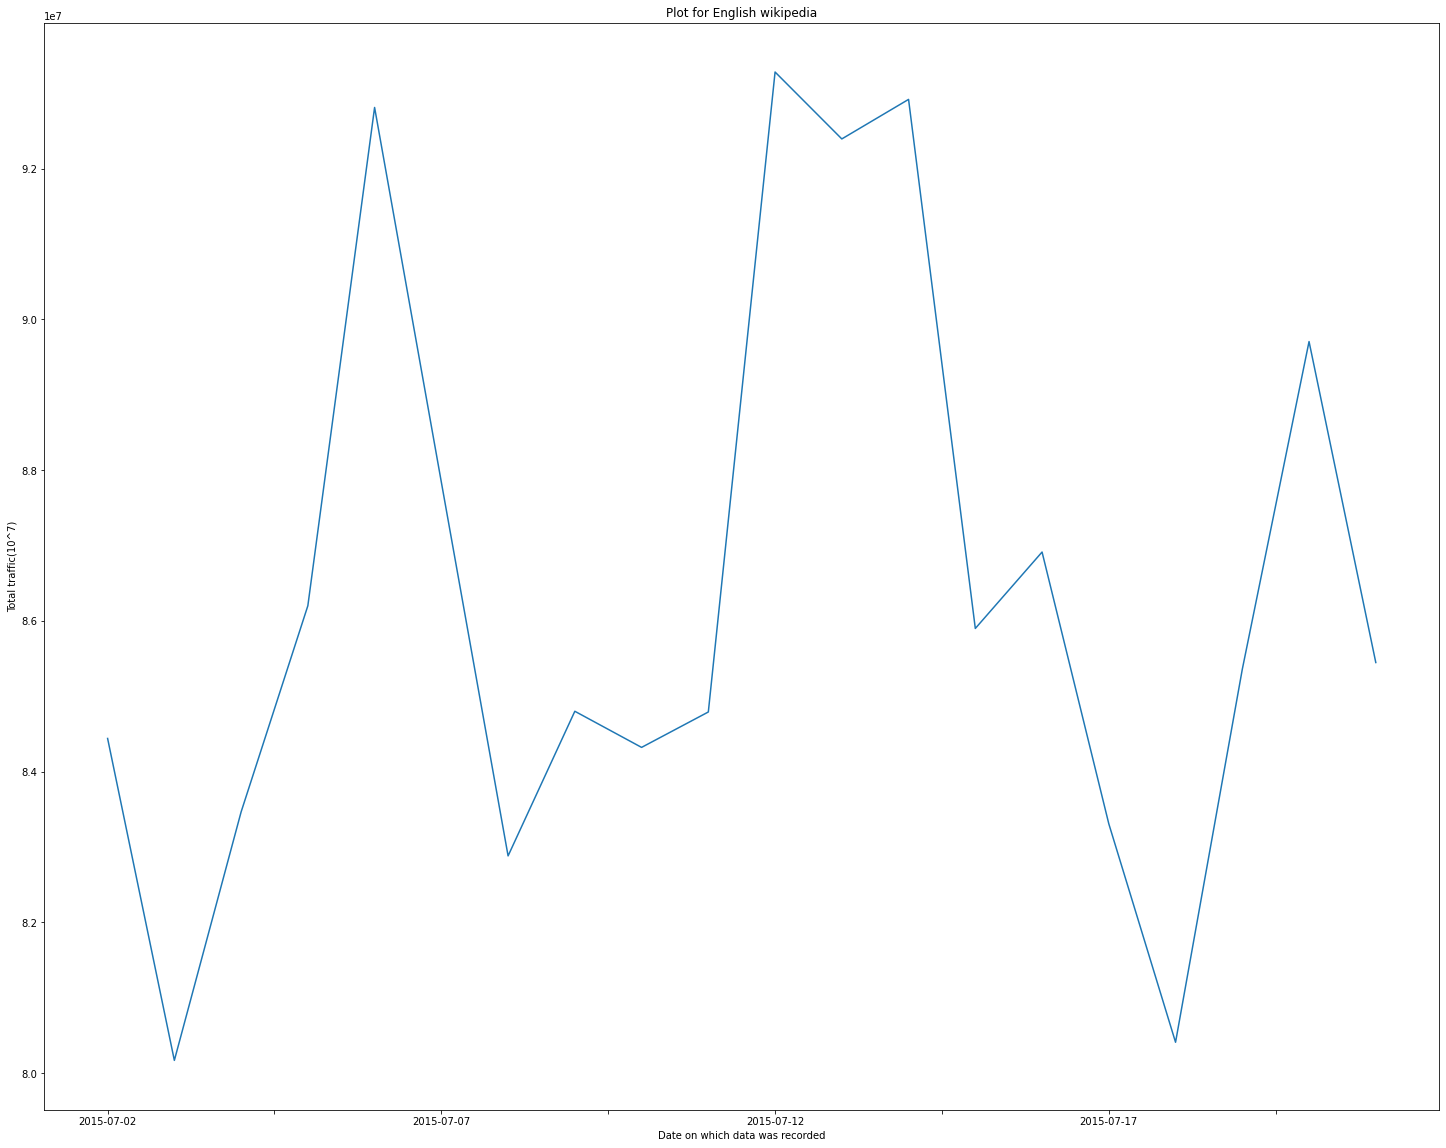

In [55]:
lang_data.iloc[3][0:20].transpose().plot(figsize=(25,20),title='Plot for English wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()


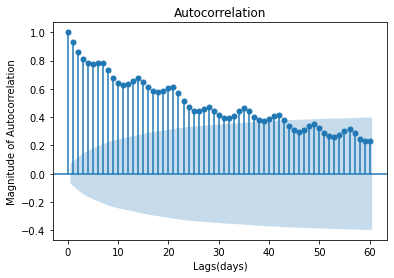

In [56]:
x=plot_acf(lang_data.transpose().en,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

This also shows high corelation value for 7 days lag. After that auto corelation value is for 7,14,21,28..... days is always higher than other days corelation which shows a strong weekly trend.
Conclusion- There is high weekly seasonality.

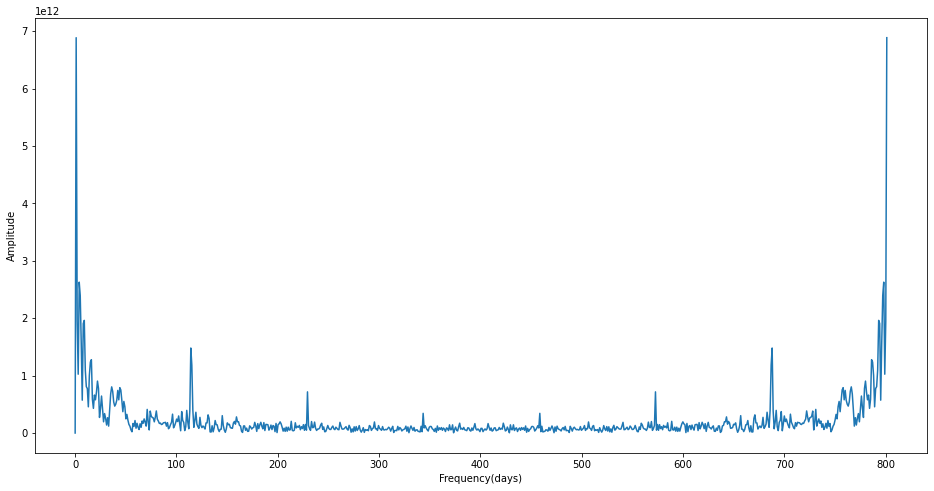

In [57]:
data=lang_data.transpose().en.values[1:] 
data=data-np.mean(data) 
x=fft.fft(data) 
freq=np.linspace(0,801,801) 
y=803*np.abs(x[0:803]) 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

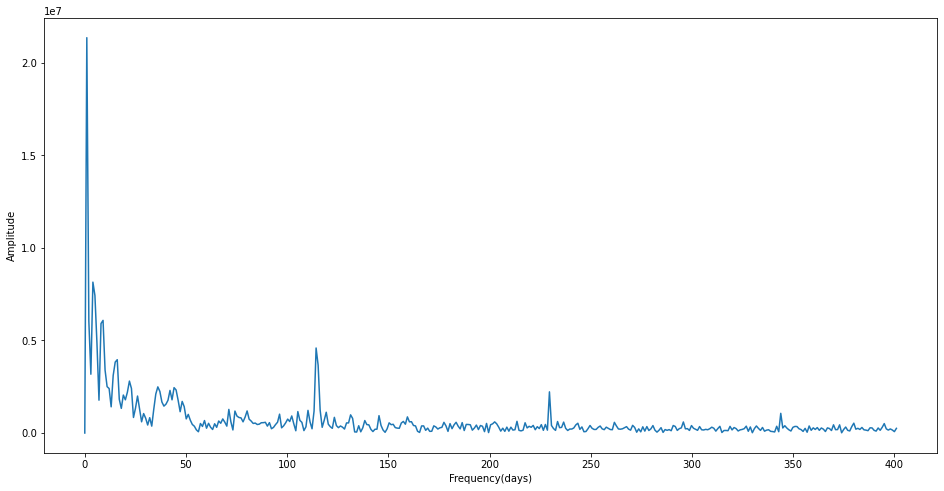

In [58]:
data=lang_data.transpose().en.values[1:] 
data=data-np.mean(data) 
x=fft.fft(data) 
freq=np.linspace(0,803//2,803//2) 
y=2/803*np.abs(x[0:803//2]) 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()



This also has peaks around same time like the previous one. Regular small peaks can also be seen. Conclusion- Just like Spanish , this also has quarterly seasonality

# Russian

In [59]:
lang_data

# de-German,
# en-English,
# es-Spanish,
# fr-French,
# ja-Japanese,
# ru-Russia,
# zh-Chinese,
# nt = -edia pages(Wikimedia)

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
fr  8.512987e+06  8.186089e+06  8.749959e+06  8.590587e+06  8.949916e+06   
nt  1.500411e+06  1.415762e+06  1.208134e+06  1.319721e+06  1.530057e+06   
es  1.460121e+07  1.342790e+07  1.260681e+07  1.371046e+07  1.562568e+07   
en  8.443924e+07  8.016843e+07  8.346406e+07  8.619962e+07  9.281031e+07   
ru  9.627679e+06  8.923491e+06  8.393279e+06  8.938585e+06  9.629063e+06   
zh  4.151692e+06  4.123910e+06  4.163694e+06  4.441489e+06  4.464567e+06   
de  1.314242e+07  1.261541e+07  1.157352e+07  1.347039e+07  1.481479e+07   
ja  1.362082e+07  1.230543e+07  1.545635e+07  1.482743e+07  1.292083e+07   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
fr  8.651196e+06  8.492320e+06  8.403705e+06  7.930772e+06  7.859564e+06  ...   
nt  1.645994e+06  1.664654e+06  1.490766e+06  1.502152e+06  1.153058e+06  ...   
es  1.523094e+07  1.478218e+07  1.450318e+07  1.318474e+07  1.185776e+07  ...   
en  8.783948e+07  8.288130e+07  8.480002e+07  8.432071e+07  8.479054e+07  ...   
ru  9.408504e+06  9.364151e+06  9.592358e+06  1.098494e+07  1.011422e+07  ...   
zh  4.459718e+06  4.576112e+06  4.548169e+06  4.728224e+06  4.412121e+06  ...   
de  1.434800e+07  1.461195e+07  1.402002e+07  1.307500e+07  1.206361e+07  ...   
ja  1.256921e+07  1.249331e+07  1.217882e+07  1.265359e+07  1.306822e+07  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
fr  8.905846e+06  8.498777e+06  9.048521e+06  8.177243e+06  7.986859e+06   
nt  4.345884e+06  2.541452e+06  3.143460e+06  3.021847e+06  2.723707e+06   
es  1.416267e+07  1.157611e+07  1.422620e+07  1.704043e+07  1.804609e+07   
en  7.844837e+07  8.367547e+07  9.868326e+07  9.967289e+07  9.324506e+07   
ru  9.709236e+06  9.632897e+06  9.969264e+06  9.605905e+06  1.164126e+07   
zh  4.769573e+06  5.226684e+06  5.512358e+06  5.075714e+06  5.124686e+06   
de  1.377195e+07  1.161139e+07  1.282334e+07  1.290129e+07  1.256124e+07   
ja  1.319893e+07  1.274817e+07  1.328627e+07  1.192526e+07  1.149007e+07   

      2017-09-06    2017-09-07  2017-09-08  2017-09-09  2017-09-10  
fr  9.226393e+06  9.071040e+06   8008422.0   8448785.0   9115857.0  
nt  6.745965e+06  1.045159e+07   2381036.5   2451720.0   2191754.0  
es  1.741019e+07  1.678652e+07  14396144.0  11635459.0  13516893.0  
en  9.310337e+07  9.794220e+07  74657049.0  72158912.5  82675404.0  
ru  1.513207e+07  1.062166e+07   9195616.0   9359213.0  10230383.0  
zh  5.000526e+06  5.212388e+06   5026137.0   5251234.0   5466627.0  
de  1.452796e+07  1.817293e+07  11885967.5  11045738.5  12297360.0  
ja  1.183533e+07  1.310296e+07  11830530.0  12637410.0  14077676.0  

[8 rows x 802 columns]

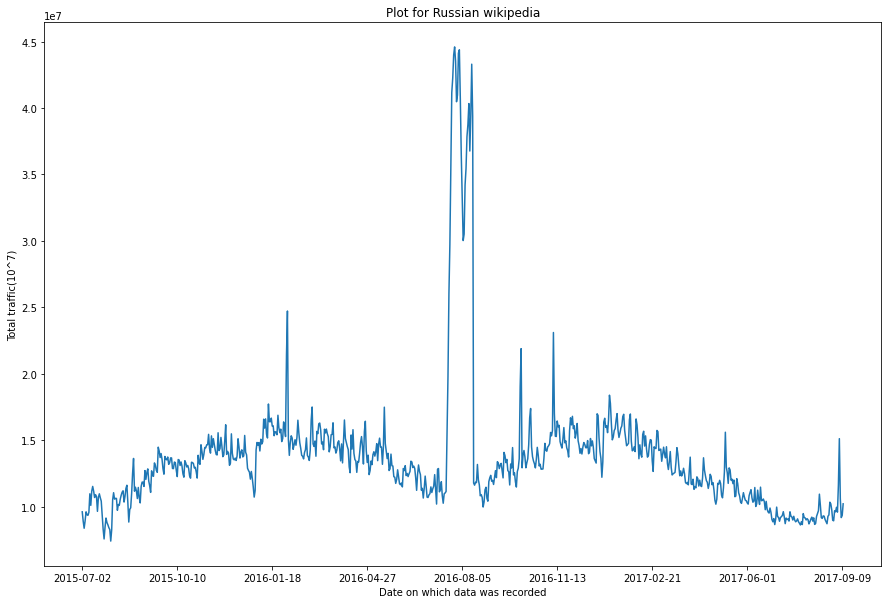

In [60]:
lang_data.iloc[4].transpose().plot(figsize=(15,10),title='Plot for Russian wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

Not much of upward or downward trend but large spike in Q3 of 2016. 

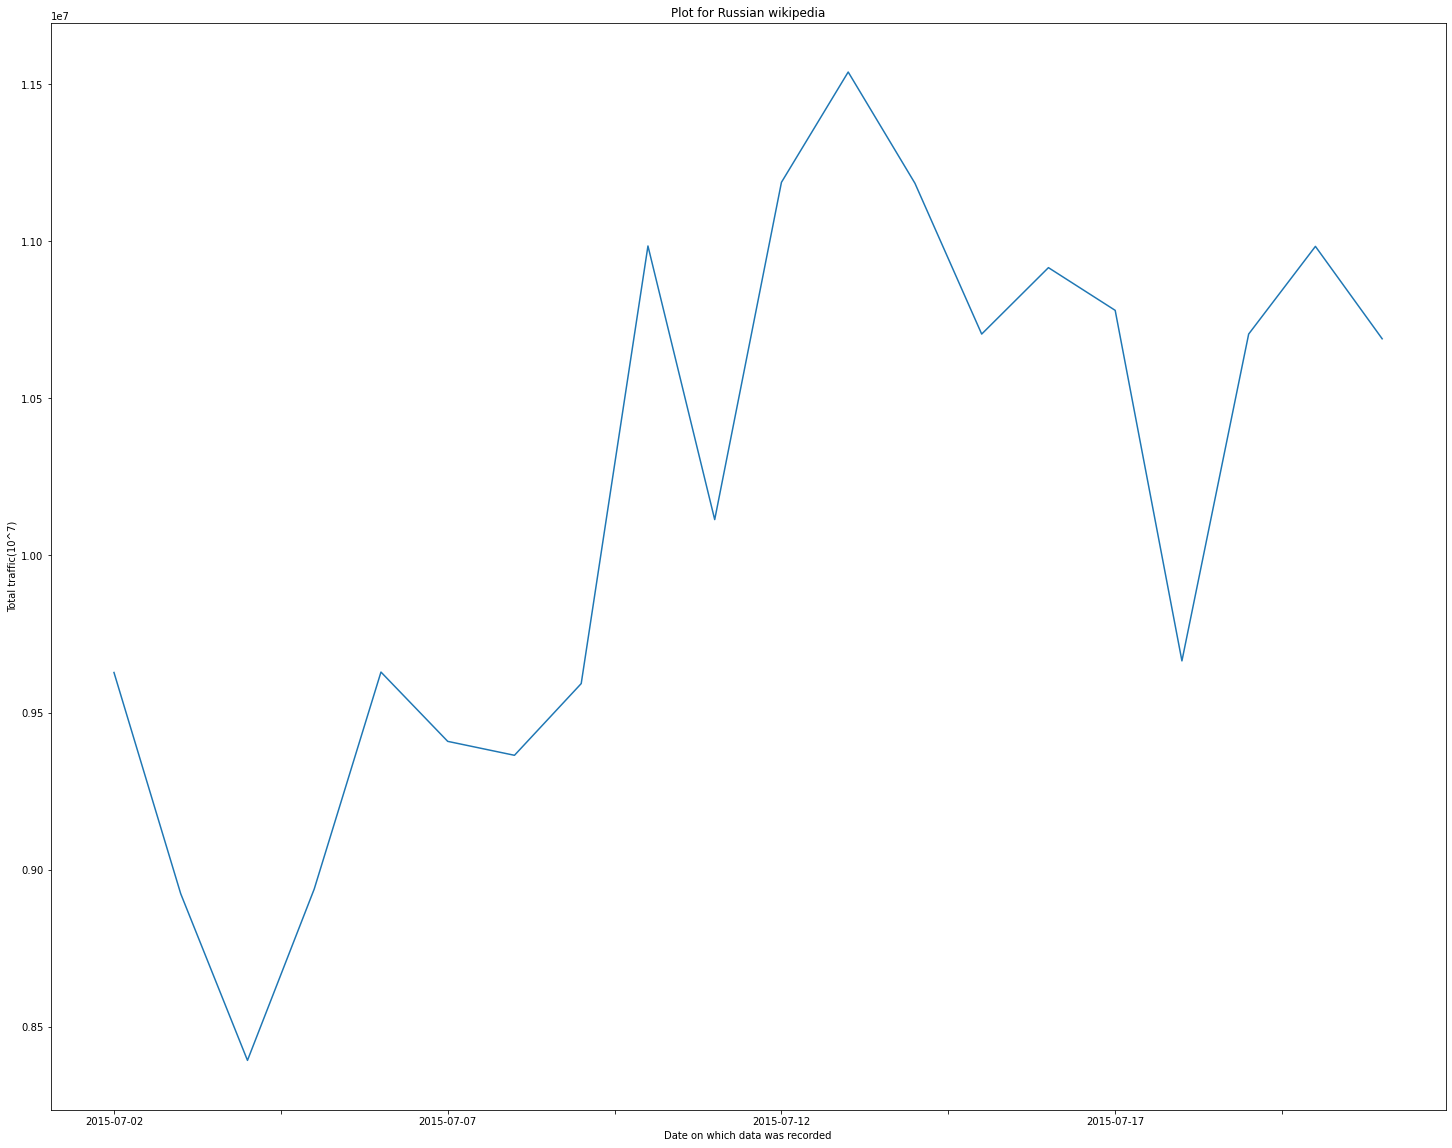

In [61]:
lang_data.iloc[4][0:20].transpose().plot(figsize=(25,20),title='Plot for Russian wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

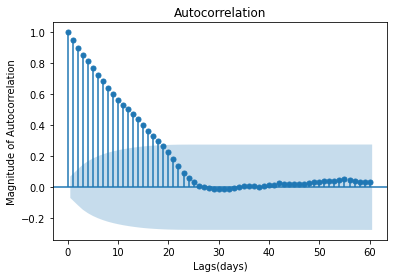

In [62]:
x=plot_acf(lang_data.transpose().ru,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()


This is quite different than other languages. Here we do not see the weekly trend.
So using lag of 7 won;t be good here, lag of 1,2,3 will be best.

For this reason, we can process and model diffrent langiagee differently or use optimal lag that might work for all language.


it means, people in rissia do not care about weekend, rate of accessing the wikipedia is  unifoirm

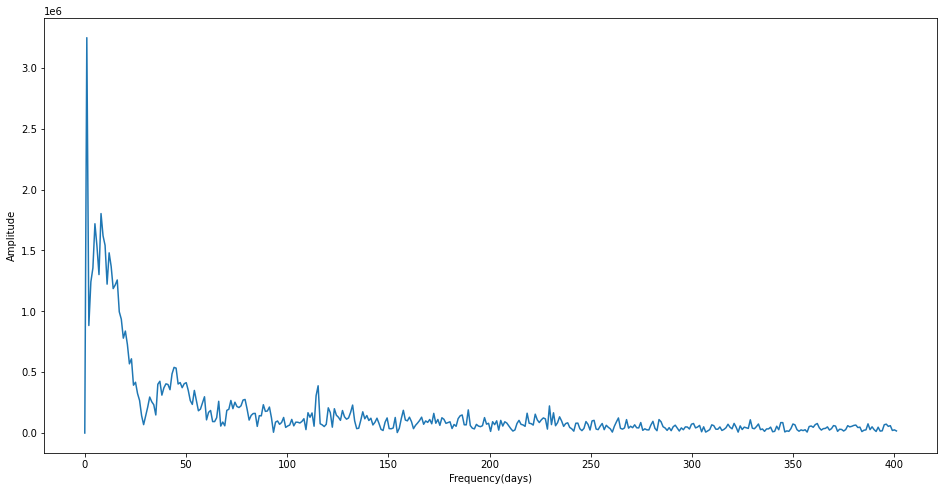

In [63]:
data=lang_data.transpose().ru.values[1:]
data=data-np.mean(data) 
x=fft.fft(data) 
freq=np.linspace(0,803//2,803//2)
y=2/803*np.abs(x[0:803//2]) 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()


Do not show any seasonal pattern like previos

In [65]:
lang_data

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
fr  8.512987e+06  8.186089e+06  8.749959e+06  8.590587e+06  8.949916e+06   
nt  1.500411e+06  1.415762e+06  1.208134e+06  1.319721e+06  1.530057e+06   
es  1.460121e+07  1.342790e+07  1.260681e+07  1.371046e+07  1.562568e+07   
en  8.443924e+07  8.016843e+07  8.346406e+07  8.619962e+07  9.281031e+07   
ru  9.627679e+06  8.923491e+06  8.393279e+06  8.938585e+06  9.629063e+06   
zh  4.151692e+06  4.123910e+06  4.163694e+06  4.441489e+06  4.464567e+06   
de  1.314242e+07  1.261541e+07  1.157352e+07  1.347039e+07  1.481479e+07   
ja  1.362082e+07  1.230543e+07  1.545635e+07  1.482743e+07  1.292083e+07   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
fr  8.651196e+06  8.492320e+06  8.403705e+06  7.930772e+06  7.859564e+06  ...   
nt  1.645994e+06  1.664654e+06  1.490766e+06  1.502152e+06  1.153058e+06  ...   
es  1.523094e+07  1.478218e+07  1.450318e+07  1.318474e+07  1.185776e+07  ...   
en  8.783948e+07  8.288130e+07  8.480002e+07  8.432071e+07  8.479054e+07  ...   
ru  9.408504e+06  9.364151e+06  9.592358e+06  1.098494e+07  1.011422e+07  ...   
zh  4.459718e+06  4.576112e+06  4.548169e+06  4.728224e+06  4.412121e+06  ...   
de  1.434800e+07  1.461195e+07  1.402002e+07  1.307500e+07  1.206361e+07  ...   
ja  1.256921e+07  1.249331e+07  1.217882e+07  1.265359e+07  1.306822e+07  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
fr  8.905846e+06  8.498777e+06  9.048521e+06  8.177243e+06  7.986859e+06   
nt  4.345884e+06  2.541452e+06  3.143460e+06  3.021847e+06  2.723707e+06   
es  1.416267e+07  1.157611e+07  1.422620e+07  1.704043e+07  1.804609e+07   
en  7.844837e+07  8.367547e+07  9.868326e+07  9.967289e+07  9.324506e+07   
ru  9.709236e+06  9.632897e+06  9.969264e+06  9.605905e+06  1.164126e+07   
zh  4.769573e+06  5.226684e+06  5.512358e+06  5.075714e+06  5.124686e+06   
de  1.377195e+07  1.161139e+07  1.282334e+07  1.290129e+07  1.256124e+07   
ja  1.319893e+07  1.274817e+07  1.328627e+07  1.192526e+07  1.149007e+07   

      2017-09-06    2017-09-07  2017-09-08  2017-09-09  2017-09-10  
fr  9.226393e+06  9.071040e+06   8008422.0   8448785.0   9115857.0  
nt  6.745965e+06  1.045159e+07   2381036.5   2451720.0   2191754.0  
es  1.741019e+07  1.678652e+07  14396144.0  11635459.0  13516893.0  
en  9.310337e+07  9.794220e+07  74657049.0  72158912.5  82675404.0  
ru  1.513207e+07  1.062166e+07   9195616.0   9359213.0  10230383.0  
zh  5.000526e+06  5.212388e+06   5026137.0   5251234.0   5466627.0  
de  1.452796e+07  1.817293e+07  11885967.5  11045738.5  12297360.0  
ja  1.183533e+07  1.310296e+07  11830530.0  12637410.0  14077676.0  

[8 rows x 802 columns]

# Wiki Media

In [66]:
lang_data

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
fr  8.512987e+06  8.186089e+06  8.749959e+06  8.590587e+06  8.949916e+06   
nt  1.500411e+06  1.415762e+06  1.208134e+06  1.319721e+06  1.530057e+06   
es  1.460121e+07  1.342790e+07  1.260681e+07  1.371046e+07  1.562568e+07   
en  8.443924e+07  8.016843e+07  8.346406e+07  8.619962e+07  9.281031e+07   
ru  9.627679e+06  8.923491e+06  8.393279e+06  8.938585e+06  9.629063e+06   
zh  4.151692e+06  4.123910e+06  4.163694e+06  4.441489e+06  4.464567e+06   
de  1.314242e+07  1.261541e+07  1.157352e+07  1.347039e+07  1.481479e+07   
ja  1.362082e+07  1.230543e+07  1.545635e+07  1.482743e+07  1.292083e+07   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
fr  8.651196e+06  8.492320e+06  8.403705e+06  7.930772e+06  7.859564e+06  ...   
nt  1.645994e+06  1.664654e+06  1.490766e+06  1.502152e+06  1.153058e+06  ...   
es  1.523094e+07  1.478218e+07  1.450318e+07  1.318474e+07  1.185776e+07  ...   
en  8.783948e+07  8.288130e+07  8.480002e+07  8.432071e+07  8.479054e+07  ...   
ru  9.408504e+06  9.364151e+06  9.592358e+06  1.098494e+07  1.011422e+07  ...   
zh  4.459718e+06  4.576112e+06  4.548169e+06  4.728224e+06  4.412121e+06  ...   
de  1.434800e+07  1.461195e+07  1.402002e+07  1.307500e+07  1.206361e+07  ...   
ja  1.256921e+07  1.249331e+07  1.217882e+07  1.265359e+07  1.306822e+07  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
fr  8.905846e+06  8.498777e+06  9.048521e+06  8.177243e+06  7.986859e+06   
nt  4.345884e+06  2.541452e+06  3.143460e+06  3.021847e+06  2.723707e+06   
es  1.416267e+07  1.157611e+07  1.422620e+07  1.704043e+07  1.804609e+07   
en  7.844837e+07  8.367547e+07  9.868326e+07  9.967289e+07  9.324506e+07   
ru  9.709236e+06  9.632897e+06  9.969264e+06  9.605905e+06  1.164126e+07   
zh  4.769573e+06  5.226684e+06  5.512358e+06  5.075714e+06  5.124686e+06   
de  1.377195e+07  1.161139e+07  1.282334e+07  1.290129e+07  1.256124e+07   
ja  1.319893e+07  1.274817e+07  1.328627e+07  1.192526e+07  1.149007e+07   

      2017-09-06    2017-09-07  2017-09-08  2017-09-09  2017-09-10  
fr  9.226393e+06  9.071040e+06   8008422.0   8448785.0   9115857.0  
nt  6.745965e+06  1.045159e+07   2381036.5   2451720.0   2191754.0  
es  1.741019e+07  1.678652e+07  14396144.0  11635459.0  13516893.0  
en  9.310337e+07  9.794220e+07  74657049.0  72158912.5  82675404.0  
ru  1.513207e+07  1.062166e+07   9195616.0   9359213.0  10230383.0  
zh  5.000526e+06  5.212388e+06   5026137.0   5251234.0   5466627.0  
de  1.452796e+07  1.817293e+07  11885967.5  11045738.5  12297360.0  
ja  1.183533e+07  1.310296e+07  11830530.0  12637410.0  14077676.0  

[8 rows x 802 columns]

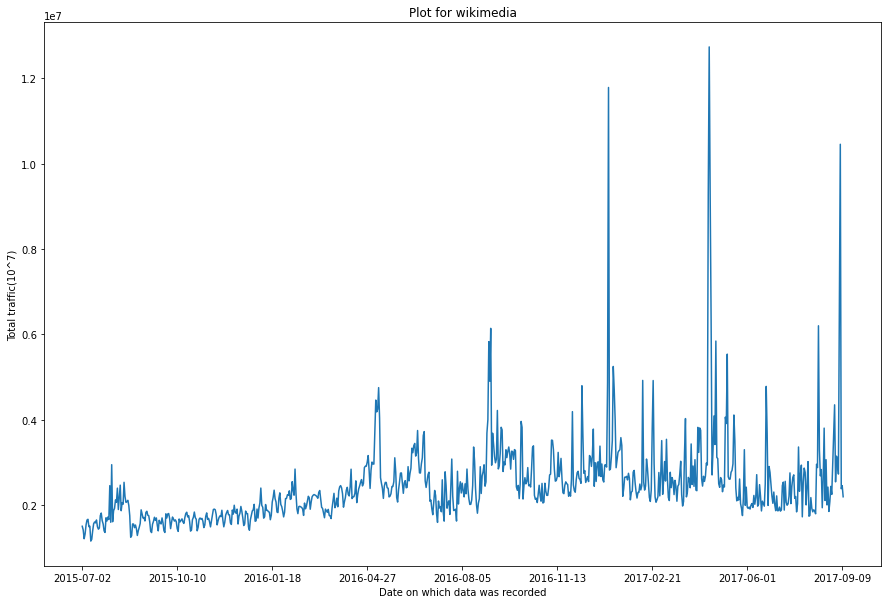

In [67]:

lang_data.iloc[1].transpose().plot(figsize=(15,10),title='Plot for wikimedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()


No spikes before april 2016 ( 2016 - 04) but after that we see regular spkies

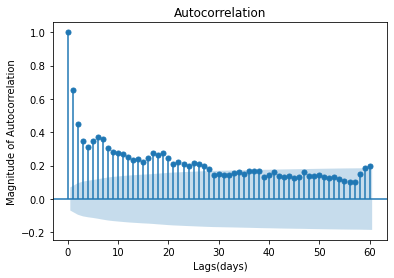

In [68]:
x=plot_acf(lang_data.transpose().nt,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

Not very strick weekly pattern , lag of 1,2 will be good but one important thing to notice is, lag of 7 is higher than 5,6 which suggesthere is ome weekly seasonality but not very strong as others

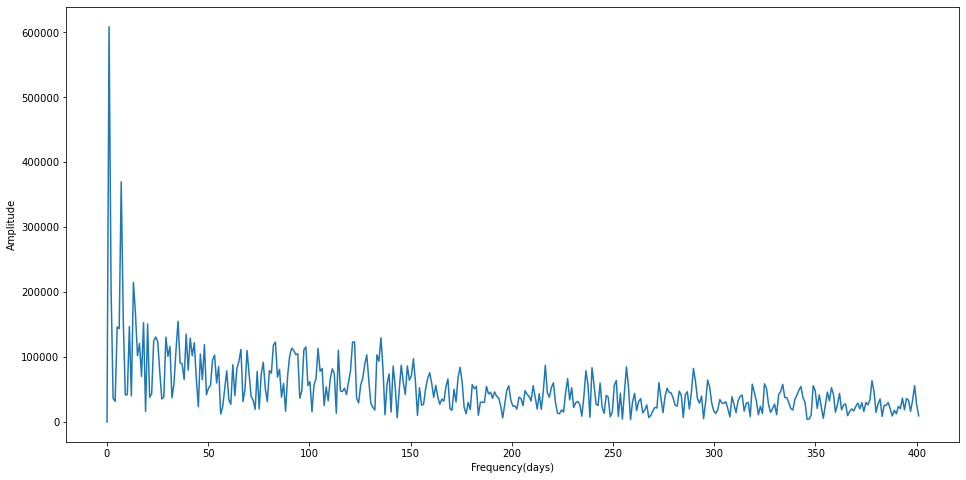

In [69]:
data=lang_data.transpose().nt.values[1:] 
data=data-np.mean(data) 
x=fft.fft(data) 
freq=np.linspace(0,803//2,803//2) 
y=2/803*np.abs(x[0:803//2]) 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

NO seasonality is seen like others quarterly.



Regular peaks are there in the data but no large peaks like in the previous graphs. Conclusion- We can see that there is no srasonality in the media pages


# Japanese

In [70]:
lang_data


# de-German,
# en-English,
# es-Spanish,
# fr-French,
# ja-Japanese,
# ru-Russia,
# zh-Chinese,
# nt = -edia pages(Wikimedia)

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
fr  8.512987e+06  8.186089e+06  8.749959e+06  8.590587e+06  8.949916e+06   
nt  1.500411e+06  1.415762e+06  1.208134e+06  1.319721e+06  1.530057e+06   
es  1.460121e+07  1.342790e+07  1.260681e+07  1.371046e+07  1.562568e+07   
en  8.443924e+07  8.016843e+07  8.346406e+07  8.619962e+07  9.281031e+07   
ru  9.627679e+06  8.923491e+06  8.393279e+06  8.938585e+06  9.629063e+06   
zh  4.151692e+06  4.123910e+06  4.163694e+06  4.441489e+06  4.464567e+06   
de  1.314242e+07  1.261541e+07  1.157352e+07  1.347039e+07  1.481479e+07   
ja  1.362082e+07  1.230543e+07  1.545635e+07  1.482743e+07  1.292083e+07   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
fr  8.651196e+06  8.492320e+06  8.403705e+06  7.930772e+06  7.859564e+06  ...   
nt  1.645994e+06  1.664654e+06  1.490766e+06  1.502152e+06  1.153058e+06  ...   
es  1.523094e+07  1.478218e+07  1.450318e+07  1.318474e+07  1.185776e+07  ...   
en  8.783948e+07  8.288130e+07  8.480002e+07  8.432071e+07  8.479054e+07  ...   
ru  9.408504e+06  9.364151e+06  9.592358e+06  1.098494e+07  1.011422e+07  ...   
zh  4.459718e+06  4.576112e+06  4.548169e+06  4.728224e+06  4.412121e+06  ...   
de  1.434800e+07  1.461195e+07  1.402002e+07  1.307500e+07  1.206361e+07  ...   
ja  1.256921e+07  1.249331e+07  1.217882e+07  1.265359e+07  1.306822e+07  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
fr  8.905846e+06  8.498777e+06  9.048521e+06  8.177243e+06  7.986859e+06   
nt  4.345884e+06  2.541452e+06  3.143460e+06  3.021847e+06  2.723707e+06   
es  1.416267e+07  1.157611e+07  1.422620e+07  1.704043e+07  1.804609e+07   
en  7.844837e+07  8.367547e+07  9.868326e+07  9.967289e+07  9.324506e+07   
ru  9.709236e+06  9.632897e+06  9.969264e+06  9.605905e+06  1.164126e+07   
zh  4.769573e+06  5.226684e+06  5.512358e+06  5.075714e+06  5.124686e+06   
de  1.377195e+07  1.161139e+07  1.282334e+07  1.290129e+07  1.256124e+07   
ja  1.319893e+07  1.274817e+07  1.328627e+07  1.192526e+07  1.149007e+07   

      2017-09-06    2017-09-07  2017-09-08  2017-09-09  2017-09-10  
fr  9.226393e+06  9.071040e+06   8008422.0   8448785.0   9115857.0  
nt  6.745965e+06  1.045159e+07   2381036.5   2451720.0   2191754.0  
es  1.741019e+07  1.678652e+07  14396144.0  11635459.0  13516893.0  
en  9.310337e+07  9.794220e+07  74657049.0  72158912.5  82675404.0  
ru  1.513207e+07  1.062166e+07   9195616.0   9359213.0  10230383.0  
zh  5.000526e+06  5.212388e+06   5026137.0   5251234.0   5466627.0  
de  1.452796e+07  1.817293e+07  11885967.5  11045738.5  12297360.0  
ja  1.183533e+07  1.310296e+07  11830530.0  12637410.0  14077676.0  

[8 rows x 802 columns]

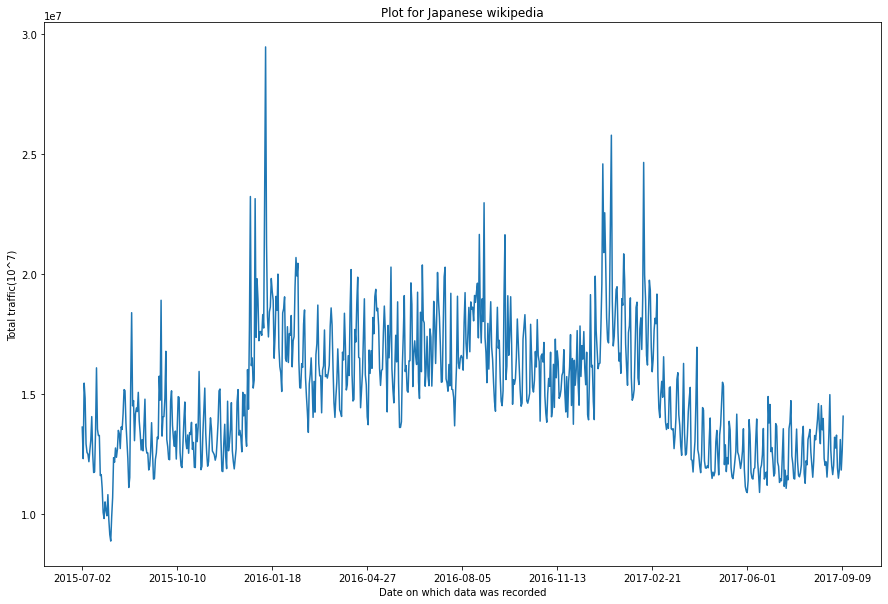

In [71]:
lang_data.iloc[7].transpose().plot(figsize=(15,10),title='Plot for Japanese wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

- Large spikes during 2016
- downward trend after fev 2017

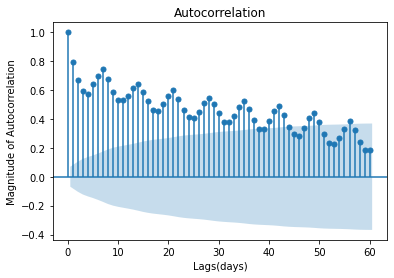

In [72]:
x=plot_acf(lang_data.transpose().ja,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()


Similar to some other language plots, it also has good corelation for 7 days lag.
Conclusion- There is weekly seasonality in the data

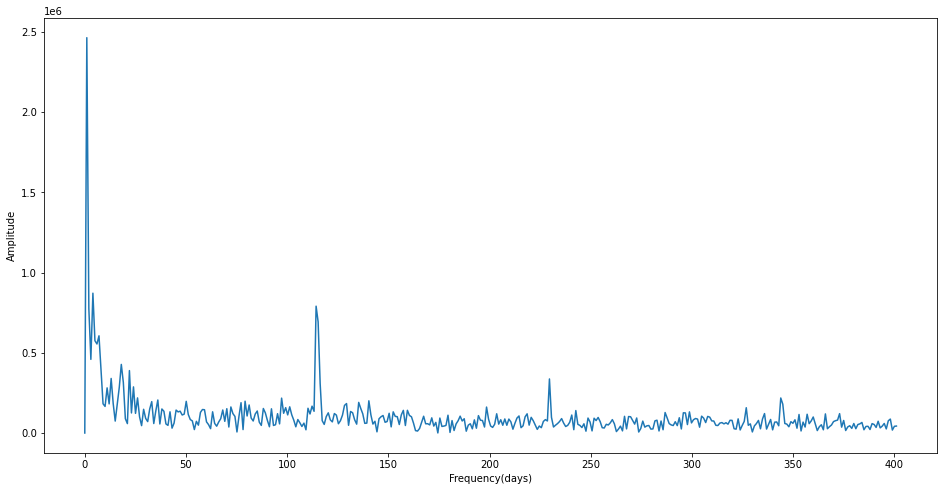

In [73]:
data=lang_data.transpose().ja.values[1:] 
data=data-np.mean(data)
x=fft.fft(data) 
freq=np.linspace(0,803//2,803//2) 
y=2/803*np.abs(x[0:803//2]) 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

It is very similar to the plots we saw initially, peaks at 120 and 230 days.
Conclusion- Data has seasonality for 120 days i.e. quarterly 

# German

In [74]:
lang_data


# de-German,
# en-English,
# es-Spanish,
# fr-French,
# ja-Japanese,
# ru-Russia,
# zh-Chinese,
# nt = -edia pages(Wikimedia)

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
fr  8.512987e+06  8.186089e+06  8.749959e+06  8.590587e+06  8.949916e+06   
nt  1.500411e+06  1.415762e+06  1.208134e+06  1.319721e+06  1.530057e+06   
es  1.460121e+07  1.342790e+07  1.260681e+07  1.371046e+07  1.562568e+07   
en  8.443924e+07  8.016843e+07  8.346406e+07  8.619962e+07  9.281031e+07   
ru  9.627679e+06  8.923491e+06  8.393279e+06  8.938585e+06  9.629063e+06   
zh  4.151692e+06  4.123910e+06  4.163694e+06  4.441489e+06  4.464567e+06   
de  1.314242e+07  1.261541e+07  1.157352e+07  1.347039e+07  1.481479e+07   
ja  1.362082e+07  1.230543e+07  1.545635e+07  1.482743e+07  1.292083e+07   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
fr  8.651196e+06  8.492320e+06  8.403705e+06  7.930772e+06  7.859564e+06  ...   
nt  1.645994e+06  1.664654e+06  1.490766e+06  1.502152e+06  1.153058e+06  ...   
es  1.523094e+07  1.478218e+07  1.450318e+07  1.318474e+07  1.185776e+07  ...   
en  8.783948e+07  8.288130e+07  8.480002e+07  8.432071e+07  8.479054e+07  ...   
ru  9.408504e+06  9.364151e+06  9.592358e+06  1.098494e+07  1.011422e+07  ...   
zh  4.459718e+06  4.576112e+06  4.548169e+06  4.728224e+06  4.412121e+06  ...   
de  1.434800e+07  1.461195e+07  1.402002e+07  1.307500e+07  1.206361e+07  ...   
ja  1.256921e+07  1.249331e+07  1.217882e+07  1.265359e+07  1.306822e+07  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
fr  8.905846e+06  8.498777e+06  9.048521e+06  8.177243e+06  7.986859e+06   
nt  4.345884e+06  2.541452e+06  3.143460e+06  3.021847e+06  2.723707e+06   
es  1.416267e+07  1.157611e+07  1.422620e+07  1.704043e+07  1.804609e+07   
en  7.844837e+07  8.367547e+07  9.868326e+07  9.967289e+07  9.324506e+07   
ru  9.709236e+06  9.632897e+06  9.969264e+06  9.605905e+06  1.164126e+07   
zh  4.769573e+06  5.226684e+06  5.512358e+06  5.075714e+06  5.124686e+06   
de  1.377195e+07  1.161139e+07  1.282334e+07  1.290129e+07  1.256124e+07   
ja  1.319893e+07  1.274817e+07  1.328627e+07  1.192526e+07  1.149007e+07   

      2017-09-06    2017-09-07  2017-09-08  2017-09-09  2017-09-10  
fr  9.226393e+06  9.071040e+06   8008422.0   8448785.0   9115857.0  
nt  6.745965e+06  1.045159e+07   2381036.5   2451720.0   2191754.0  
es  1.741019e+07  1.678652e+07  14396144.0  11635459.0  13516893.0  
en  9.310337e+07  9.794220e+07  74657049.0  72158912.5  82675404.0  
ru  1.513207e+07  1.062166e+07   9195616.0   9359213.0  10230383.0  
zh  5.000526e+06  5.212388e+06   5026137.0   5251234.0   5466627.0  
de  1.452796e+07  1.817293e+07  11885967.5  11045738.5  12297360.0  
ja  1.183533e+07  1.310296e+07  11830530.0  12637410.0  14077676.0  

[8 rows x 802 columns]

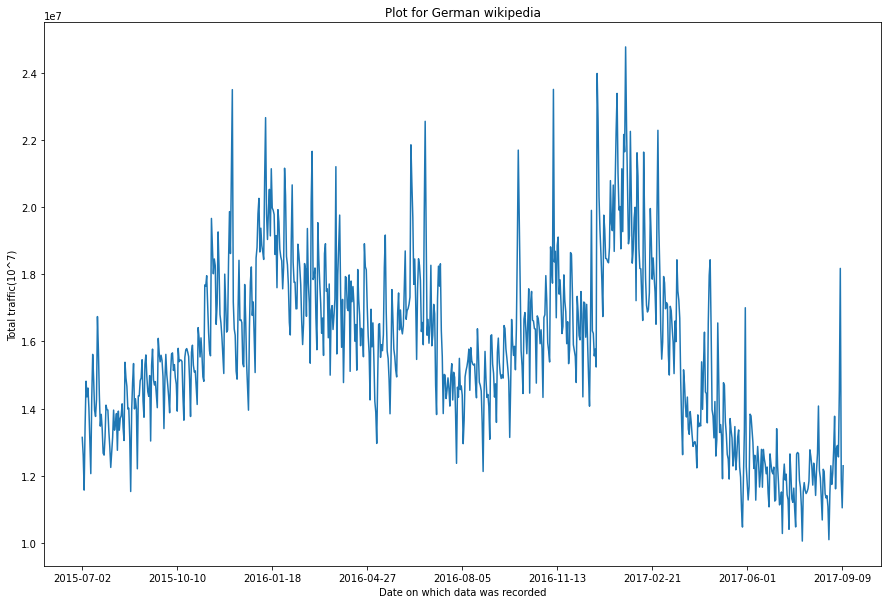

In [75]:
lang_data.iloc[6].transpose().plot(figsize=(15,10),title='Plot for German wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

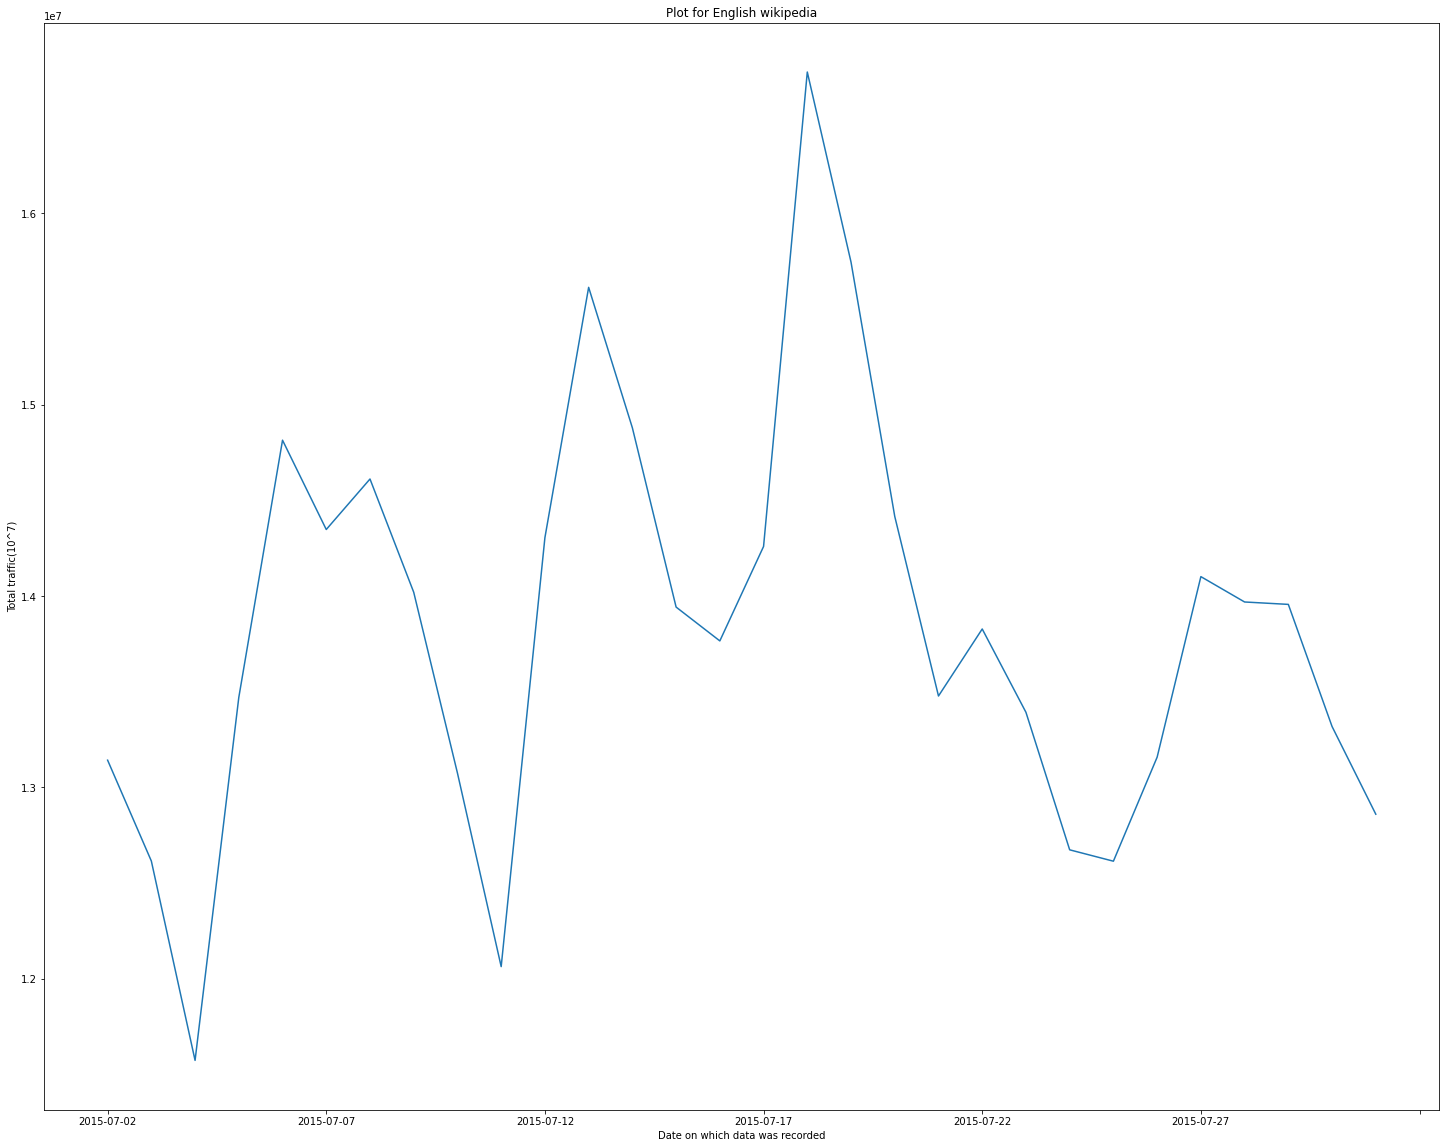

In [76]:
lang_data.iloc[6][0:30].transpose().plot(figsize=(25,20),title='Plot for English wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()




German Wikipedia has the most number of spikes among all the languages. We can see that this makes 'M' shaped like structure, goes upward then downward and again upward then again downward.

Next plot is for autocorrelation of daily traffic on German Wikipedia.


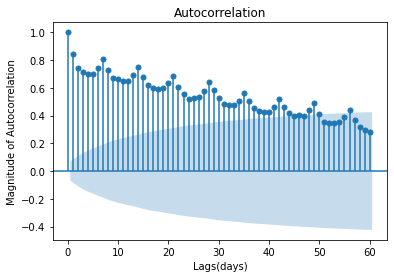

In [77]:
x=plot_acf(lang_data.transpose().de,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()



This one also follows the same trend- higher corelation for 7 days lag.
Conclusion- Like many other plots, it also has weekly seasonality.

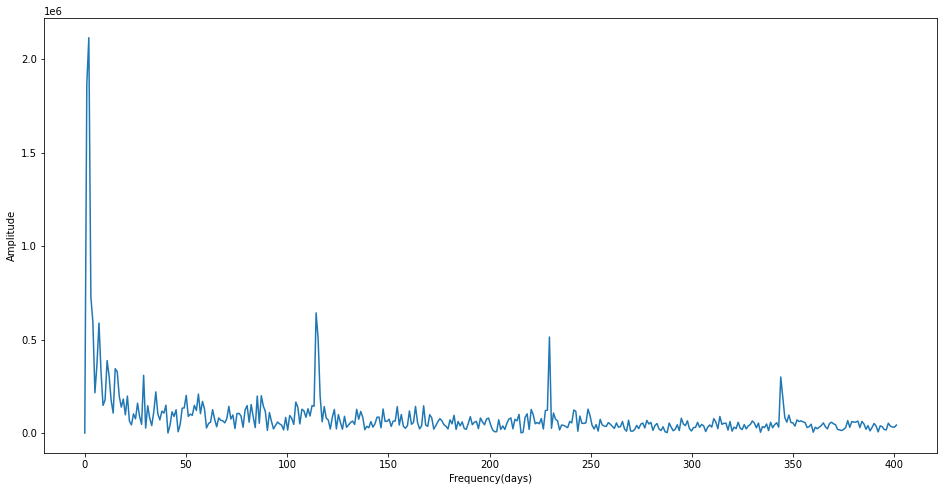

In [78]:
data=lang_data.transpose().de.values[1:] 
data=data-np.mean(data) 
x=fft.fft(data)
freq=np.linspace(0,803//2,803//2) 
y=2/803*np.abs(x[0:803//2]) #
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()




As expected there are peaks at 120 and 230 but surprisingly at around 340 days, there is a peak.
Conclusion- Like previous plots, this also shows 120 days seasonality.



# Chinnaa

In [79]:
lang_data


# de-German,
# en-English,
# es-Spanish,
# fr-French,
# ja-Japanese,
# ru-Russia,
# zh-Chinese,
# nt = -edia pages(Wikimedia)

2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
fr  8.512987e+06  8.186089e+06  8.749959e+06  8.590587e+06  8.949916e+06   
nt  1.500411e+06  1.415762e+06  1.208134e+06  1.319721e+06  1.530057e+06   
es  1.460121e+07  1.342790e+07  1.260681e+07  1.371046e+07  1.562568e+07   
en  8.443924e+07  8.016843e+07  8.346406e+07  8.619962e+07  9.281031e+07   
ru  9.627679e+06  8.923491e+06  8.393279e+06  8.938585e+06  9.629063e+06   
zh  4.151692e+06  4.123910e+06  4.163694e+06  4.441489e+06  4.464567e+06   
de  1.314242e+07  1.261541e+07  1.157352e+07  1.347039e+07  1.481479e+07   
ja  1.362082e+07  1.230543e+07  1.545635e+07  1.482743e+07  1.292083e+07   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
fr  8.651196e+06  8.492320e+06  8.403705e+06  7.930772e+06  7.859564e+06  ...   
nt  1.645994e+06  1.664654e+06  1.490766e+06  1.502152e+06  1.153058e+06  ...   
es  1.523094e+07  1.478218e+07  1.450318e+07  1.318474e+07  1.185776e+07  ...   
en  8.783948e+07  8.288130e+07  8.480002e+07  8.432071e+07  8.479054e+07  ...   
ru  9.408504e+06  9.364151e+06  9.592358e+06  1.098494e+07  1.011422e+07  ...   
zh  4.459718e+06  4.576112e+06  4.548169e+06  4.728224e+06  4.412121e+06  ...   
de  1.434800e+07  1.461195e+07  1.402002e+07  1.307500e+07  1.206361e+07  ...   
ja  1.256921e+07  1.249331e+07  1.217882e+07  1.265359e+07  1.306822e+07  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
fr  8.905846e+06  8.498777e+06  9.048521e+06  8.177243e+06  7.986859e+06   
nt  4.345884e+06  2.541452e+06  3.143460e+06  3.021847e+06  2.723707e+06   
es  1.416267e+07  1.157611e+07  1.422620e+07  1.704043e+07  1.804609e+07   
en  7.844837e+07  8.367547e+07  9.868326e+07  9.967289e+07  9.324506e+07   
ru  9.709236e+06  9.632897e+06  9.969264e+06  9.605905e+06  1.164126e+07   
zh  4.769573e+06  5.226684e+06  5.512358e+06  5.075714e+06  5.124686e+06   
de  1.377195e+07  1.161139e+07  1.282334e+07  1.290129e+07  1.256124e+07   
ja  1.319893e+07  1.274817e+07  1.328627e+07  1.192526e+07  1.149007e+07   

      2017-09-06    2017-09-07  2017-09-08  2017-09-09  2017-09-10  
fr  9.226393e+06  9.071040e+06   8008422.0   8448785.0   9115857.0  
nt  6.745965e+06  1.045159e+07   2381036.5   2451720.0   2191754.0  
es  1.741019e+07  1.678652e+07  14396144.0  11635459.0  13516893.0  
en  9.310337e+07  9.794220e+07  74657049.0  72158912.5  82675404.0  
ru  1.513207e+07  1.062166e+07   9195616.0   9359213.0  10230383.0  
zh  5.000526e+06  5.212388e+06   5026137.0   5251234.0   5466627.0  
de  1.452796e+07  1.817293e+07  11885967.5  11045738.5  12297360.0  
ja  1.183533e+07  1.310296e+07  11830530.0  12637410.0  14077676.0  

[8 rows x 802 columns]

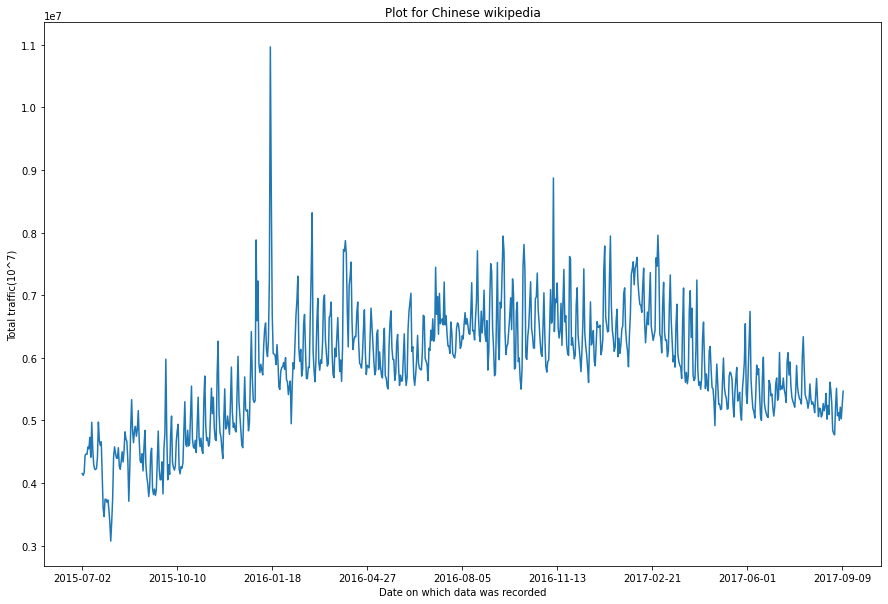

In [80]:
lang_data.iloc[5].transpose().plot(figsize=(15,10),title='Plot for Chinese wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()


Like other languages this one also has upward trend during the first few months, we can see a very large spike during January 2016

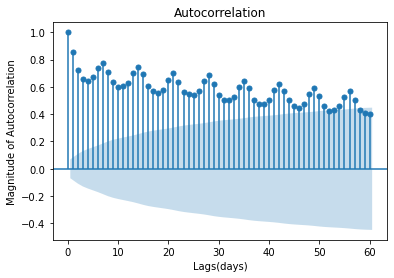

In [81]:
x=plot_acf(lang_data.transpose().zh,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

This plot is no different than others, high value for 7 days lag.
Conclusion- There is weekly seasonality in this data also.

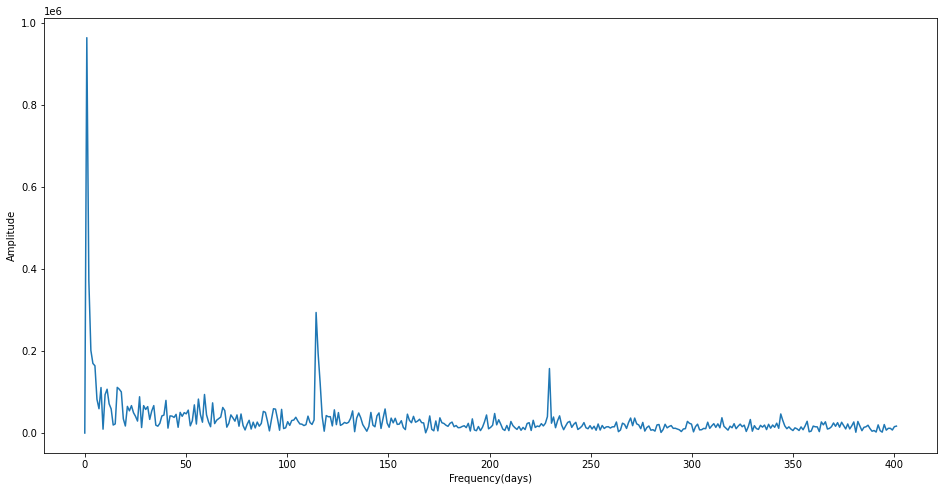

In [142]:
data=lang_data.transpose().zh.values[1:]
data=data-np.mean(data) 
x=fft.fft(data)
freq=np.linspace(0,803//2,803//2)
y=2/803*np.abs(x[0:803//2]) 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()


Very similar to previous language plot except that it has a comparitively smaller peak at 340 days.
Conclusion- There is seasonality of 120 and 230 days also.

# French

In [83]:
lang_data



2015-07-02    2015-07-03    2015-07-04    2015-07-05    2015-07-06  \
fr  8.512987e+06  8.186089e+06  8.749959e+06  8.590587e+06  8.949916e+06   
nt  1.500411e+06  1.415762e+06  1.208134e+06  1.319721e+06  1.530057e+06   
es  1.460121e+07  1.342790e+07  1.260681e+07  1.371046e+07  1.562568e+07   
en  8.443924e+07  8.016843e+07  8.346406e+07  8.619962e+07  9.281031e+07   
ru  9.627679e+06  8.923491e+06  8.393279e+06  8.938585e+06  9.629063e+06   
zh  4.151692e+06  4.123910e+06  4.163694e+06  4.441489e+06  4.464567e+06   
de  1.314242e+07  1.261541e+07  1.157352e+07  1.347039e+07  1.481479e+07   
ja  1.362082e+07  1.230543e+07  1.545635e+07  1.482743e+07  1.292083e+07   

      2015-07-07    2015-07-08    2015-07-09    2015-07-10    2015-07-11  ...  \
fr  8.651196e+06  8.492320e+06  8.403705e+06  7.930772e+06  7.859564e+06  ...   
nt  1.645994e+06  1.664654e+06  1.490766e+06  1.502152e+06  1.153058e+06  ...   
es  1.523094e+07  1.478218e+07  1.450318e+07  1.318474e+07  1.185776e+07  ...   
en  8.783948e+07  8.288130e+07  8.480002e+07  8.432071e+07  8.479054e+07  ...   
ru  9.408504e+06  9.364151e+06  9.592358e+06  1.098494e+07  1.011422e+07  ...   
zh  4.459718e+06  4.576112e+06  4.548169e+06  4.728224e+06  4.412121e+06  ...   
de  1.434800e+07  1.461195e+07  1.402002e+07  1.307500e+07  1.206361e+07  ...   
ja  1.256921e+07  1.249331e+07  1.217882e+07  1.265359e+07  1.306822e+07  ...   

      2017-09-01    2017-09-02    2017-09-03    2017-09-04    2017-09-05  \
fr  8.905846e+06  8.498777e+06  9.048521e+06  8.177243e+06  7.986859e+06   
nt  4.345884e+06  2.541452e+06  3.143460e+06  3.021847e+06  2.723707e+06   
es  1.416267e+07  1.157611e+07  1.422620e+07  1.704043e+07  1.804609e+07   
en  7.844837e+07  8.367547e+07  9.868326e+07  9.967289e+07  9.324506e+07   
ru  9.709236e+06  9.632897e+06  9.969264e+06  9.605905e+06  1.164126e+07   
zh  4.769573e+06  5.226684e+06  5.512358e+06  5.075714e+06  5.124686e+06   
de  1.377195e+07  1.161139e+07  1.282334e+07  1.290129e+07  1.256124e+07   
ja  1.319893e+07  1.274817e+07  1.328627e+07  1.192526e+07  1.149007e+07   

      2017-09-06    2017-09-07  2017-09-08  2017-09-09  2017-09-10  
fr  9.226393e+06  9.071040e+06   8008422.0   8448785.0   9115857.0  
nt  6.745965e+06  1.045159e+07   2381036.5   2451720.0   2191754.0  
es  1.741019e+07  1.678652e+07  14396144.0  11635459.0  13516893.0  
en  9.310337e+07  9.794220e+07  74657049.0  72158912.5  82675404.0  
ru  1.513207e+07  1.062166e+07   9195616.0   9359213.0  10230383.0  
zh  5.000526e+06  5.212388e+06   5026137.0   5251234.0   5466627.0  
de  1.452796e+07  1.817293e+07  11885967.5  11045738.5  12297360.0  
ja  1.183533e+07  1.310296e+07  11830530.0  12637410.0  14077676.0  

[8 rows x 802 columns]

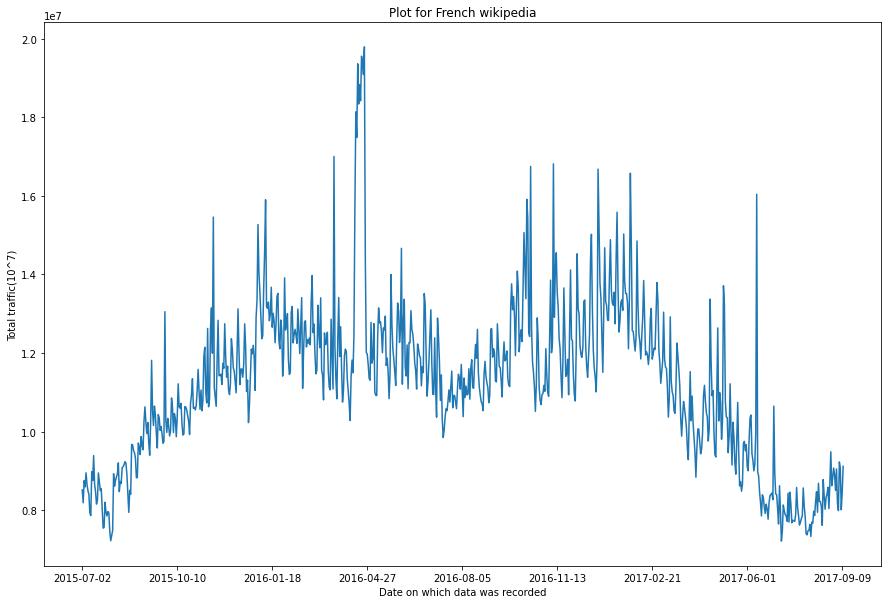

In [84]:
lang_data.iloc[0].transpose().plot(figsize=(15,10),title='Plot for French wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()



French wikipedia shows upward trend first and then after January 2017 it goes downward. Spikes can also be seen regularly but there is a large spike around March 2016.

Next plot is for autocorrelation of daily traffic on French language wikipedia

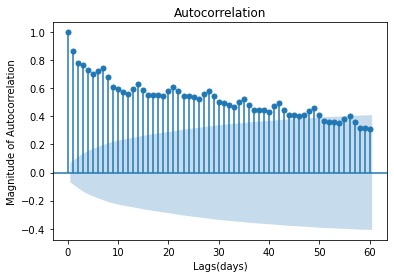

In [85]:
x=plot_acf(lang_data.transpose().fr,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()


As expected, high corealtion for 7 days.
Conclusion- There is weekly seasonality in data.

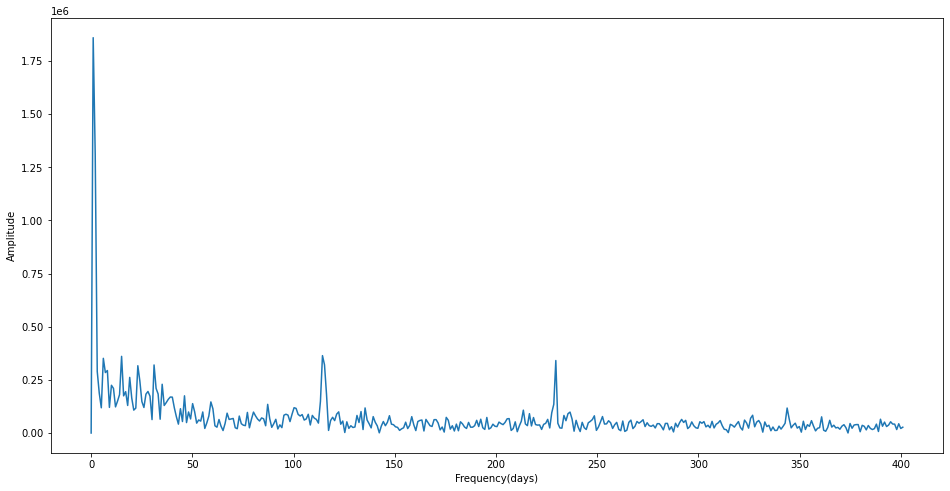

In [86]:
data=lang_data.transpose().fr.values[1:] 
data=data-np.mean(data) 
x=fft.fft(data)
freq=np.linspace(0,803//2,803//2)
y=2/803*np.abs(x[0:803//2])
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()



This is also very similar to previous plot, peaks at 120, 230 and 340 days.


Conclusion- This also shows seasonality for 120 and 230 days.



Based on this analysis, we see that most languages have upward trend during first few months and downward trend durung last few months. But, it is not that the timeseries are similair.

So, **Using Language as Feature** is a good idea.

Based on the co-relation plot, most of the language shows strong co-relation value for 7 days except Russian and wikimedia, so we can use 7 as lag value.

But, more better would be to create each model for each language.

Based on the fourier transformation, we also see the quarterly seasonal.

As we saw that almost every time series have three parts, 
upward trend for first few months 
then no trend for few months 
and then downward trend for last few months

so,accordingle we will divide our time series data into three parts- 
- till Dec 2015,
- Jan 2016- Jan 2017,
- Feb 2017- Sep 2017

After that we will take median of every time series in above three different parts and analyze them
First part will be of 184 days, second- 397 days, third-222 days


In [94]:
part1_med=[]
part2_med=[]
part3_med=[]
for i in range(len(Page_name)):
    part1_med.append(np.median(training_data.iloc[i].values[1:185]))
    part2_med.append(np.median(training_data.iloc[i].values[185:582]))
    part3_med.append(np.median(training_data.iloc[i].values[582:805]))

In [95]:
med_data=pd.DataFrame([part1_med,part2_med,part3_med],index=['part1','part2','part3'])

In [96]:
med_data.head()

0       1       2       3       4       5       6       7       8       \
part1    11.0    15.0     3.0    10.0     0.0     9.0     0.0    25.0    23.0   
part2    18.0    19.0     4.0    14.0     4.0    16.0     4.0    37.0    34.0   
part3    22.0    21.0     3.0    17.0    15.0    17.0     7.0    37.0    42.0   

       9       ...  145053  145054  145055  145056  145057  145058  145059  \
part1    14.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
part2    25.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
part3    26.0  ...     5.0     8.0     5.0    17.0    23.0     5.0     8.0   

       145060  145061  145062  
part1     0.0     0.0     0.0  
part2     0.0     0.0     0.0  
part3    27.0     8.0    10.0  

[3 rows x 145063 columns]

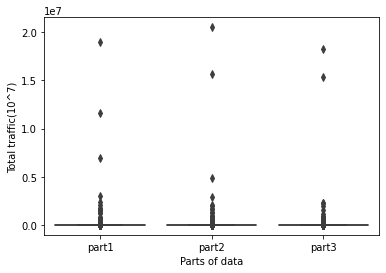

In [97]:
sns.boxplot(data=med_data.transpose())
plt.xlabel('Parts of data')
plt.ylabel('Total traffic(10^7)')
plt.show()

It seems there are some outleirs present on the data whuche measn there are sone timeseies which has medua >>>>> medain of most of the timeseries

In [98]:
x=[25,50,75,100]
print('For part 1 : ')
for i in x:
    print('{}th percentile of part1 is : '.format(i),np.percentile(part1_med,i))
print('For part 2 : ')
for i in x:
    print('{}th percentile of part2 is : '.format(i),np.percentile(part2_med,i))
print('For part 3 : ')
for i in x:
    print('{}th percentile of part3 is : '.format(i),np.percentile(part3_med,i))  

For part 1 : 
25th percentile of part1 is :  6.0
50th percentile of part1 is :  70.0
75th percentile of part1 is :  459.5
100th percentile of part1 is :  18952124.5
For part 2 : 
25th percentile of part2 is :  14.0
50th percentile of part2 is :  118.0
75th percentile of part2 is :  546.0
100th percentile of part2 is :  20510385.0
For part 3 : 
25th percentile of part3 is :  17.0
50th percentile of part3 is :  120.0
75th percentile of part3 is :  516.0
100th percentile of part3 is :  18215074.0


Large differene between 75th adn 100th percentile.

In [99]:
x=[80,85,90,95,100]
print('For part 1 : ')
for i in x:
    print('{}th percentile of part1 is : '.format(i),np.percentile(part1_med,i))
print('For part 2 : ')
for i in x:
    print('{}th percentile of part2 is : '.format(i),np.percentile(part2_med,i))
print('For part 3 : ')
for i in x:
    print('{}th percentile of part3 is : '.format(i),np.percentile(part3_med,i)) 



For part 1 : 
80th percentile of part1 is :  633.0
85th percentile of part1 is :  881.0
90th percentile of part1 is :  1297.5
95th percentile of part1 is :  2298.5
100th percentile of part1 is :  18952124.5
For part 2 : 
80th percentile of part2 is :  725.0
85th percentile of part2 is :  985.0
90th percentile of part2 is :  1433.0
95th percentile of part2 is :  2521.0
100th percentile of part2 is :  20510385.0
For part 3 : 
80th percentile of part3 is :  682.0
85th percentile of part3 is :  924.0
90th percentile of part3 is :  1363.0
95th percentile of part3 is :  2413.899999999994
100th percentile of part3 is :  18215074.0


As we are moving towards the 100th percentile values, we see a reasonable increase in the medians of the time series data but the 100th percentile value seems very large.

In [100]:
x=[95,97,98,99,100]
print('For part 1 : ')
for i in x:
    print('{}th percentile of part1 is : '.format(i),np.percentile(part1_med,i))
print('For part 2 : ')
for i in x:
    print('{}th percentile of part2 is : '.format(i),np.percentile(part2_med,i))
print('For part 3 : ')
for i in x:
    print('{}th percentile of part3 is : '.format(i),np.percentile(part3_med,i)) 

For part 1 : 
95th percentile of part1 is :  2298.5
97th percentile of part1 is :  3427.0699999999924
98th percentile of part1 is :  4559.380000000005
99th percentile of part1 is :  6770.690000000002
100th percentile of part1 is :  18952124.5
For part 2 : 
95th percentile of part2 is :  2521.0
97th percentile of part2 is :  3637.139999999985
98th percentile of part2 is :  4733.760000000009
99th percentile of part2 is :  6957.140000000014
100th percentile of part2 is :  20510385.0
For part 3 : 
95th percentile of part3 is :  2413.899999999994
97th percentile of part3 is :  3564.139999999985
98th percentile of part3 is :  4708.520000000019
99th percentile of part3 is :  7033.660000000033
100th percentile of part3 is :  18215074.0


Seems reasonable, may be the outliers is between 99- 100th percentile

In [101]:
x=[99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]
for i in x:
    print('{}th percentile of part1 is : '.format(i),np.percentile(part1_med,i))
print('For part 2 : ')
for i in x:
    print('{}th percentile of part2 is : '.format(i),np.percentile(part2_med,i))
print('For part 3 : ')
for i in x:
    print('{}th percentile of part3 is : '.format(i),np.percentile(part3_med,i))



99.1th percentile of part1 is :  7107.71000000005
99.2th percentile of part1 is :  7572.5
99.3th percentile of part1 is :  8147.414999999979
99.4th percentile of part1 is :  8852.314000000013
99.5th percentile of part1 is :  9732.380000000005
99.6th percentile of part1 is :  10801.384000000035
99.7th percentile of part1 is :  11910.907000000007
99.8th percentile of part1 is :  14400.88799999986
99.9th percentile of part1 is :  21122.00900000191
100th percentile of part1 is :  18952124.5
For part 2 : 
99.1th percentile of part2 is :  7347.44200000001
99.2th percentile of part2 is :  7817.503999999986
99.3th percentile of part2 is :  8351.565999999992
99.4th percentile of part2 is :  9041.884000000078
99.5th percentile of part2 is :  9817.690000000002
99.6th percentile of part2 is :  10883.504000000015
99.7th percentile of part2 is :  12669.768000000156
99.8th percentile of part2 is :  15388.519999999786
99.9th percentile of part2 is :  22324.06400000304
100th percentile of part2 is :  2

In [102]:
# It seems the value is reasobale upto 99.9th percentle, but 100 percentile has very alrge. 
# This needs to be taken care while feature engineering.

In [103]:

x=[part1_med,part2_med,part3_med]
for k in x:
    per=np.percentile(k,99.9)
    for i in range(len(k)):
        if(k[i]>per):
            k[i]=np.median(k)
      


In [104]:
# med_data=pd.DataFrame([part1_med,part2_med,part3_med],index=['part1','part2','part3'])
# sns.boxplot(data=med_data.transpose())
# plt.xlabel('Parts of data')
# plt.ylabel('Total traffic(10^7)')
# plt.show()


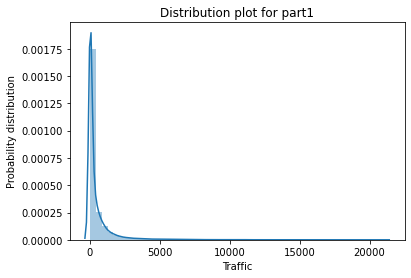

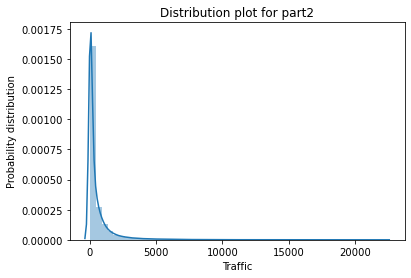

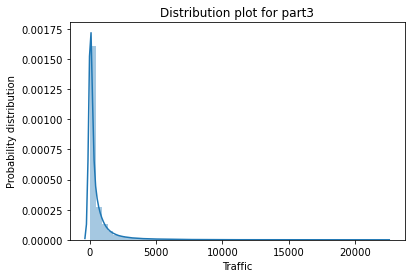

In [105]:
ax=sns.distplot(part1_med).set_title('Distribution plot for part1')
plt.xlabel('Traffic')
plt.ylabel('Probability distribution')
plt.show()
ax=sns.distplot(part2_med).set_title('Distribution plot for part2')
plt.xlabel('Traffic')
plt.ylabel('Probability distribution')
plt.show()
ax=sns.distplot(part2_med).set_title('Distribution plot for part3')
plt.xlabel('Traffic')
plt.ylabel('Probability distribution')
plt.show()



This shows that our data is highly skewed and major portion of the data has very small values.

Conclusion- Out of the 145k time series that we have in our dataset, most of the time series has small traffic.

Now, lets check if traffic differ on the basis of bots or actual human traffic. As we know that Page name also includes if the wiki page is accessed by spider or actual human


# EDA based on spider and non-spider data

In [106]:
agent_data_list=[]
agent_number=[0,0]
from operator import add
for i in range(2):
    agent_data_list.append(np.zeros(training_data.shape[1]-1))
    
for i in range(len(Page_name)):
    add_list=training_data.iloc[i].values[1:]
    if('spider' in Page_name[i]):
        agent_data_list[0]=list(map(add,agent_data_list[0],add_list))
        agent_number[0]=agent_number[0] + 1
    else:
        agent_data_list[1]=list(map(add,agent_data_list[1],add_list))  
        agent_number[1]=agent_number[1] + 1

In [107]:
new_data=pd.DataFrame(agent_data_list,index=['spider_data','nonspider_data'],columns=training_data.columns.values[1:])
new_data.head(10)


2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
spider_data     5.978172e+05  5.723874e+05  6.126900e+05  6.182509e+05   
nonspider_data  1.455819e+08  1.395955e+08  1.368186e+08  1.473780e+08   

                  2015-07-06    2015-07-07    2015-07-08    2015-07-09  \
spider_data     5.810633e+05  6.230460e+05  7.522096e+05  7.986332e+05   
nonspider_data  1.559906e+08  1.513156e+08  1.470008e+08  1.476687e+08   

                  2015-07-10    2015-07-11  ...    2017-09-01    2017-09-02  \
spider_data     7.415409e+05  6.000656e+05  ...  5.272320e+06  4.701820e+06   
nonspider_data  1.460941e+08  1.417497e+08  ...  1.387840e+08  1.394567e+08   

                  2017-09-03    2017-09-04    2017-09-05    2017-09-06  \
spider_data     5.701224e+06  4.985780e+06  4.425518e+06  4.091770e+06   
nonspider_data  1.537509e+08  1.562203e+08  1.547853e+08  1.503183e+08   

                  2017-09-07    2017-09-08    2017-09-09    2017-09-10  
spider_data     9.135809e+06  2.032898e+06  1.944664e+06  1.940969e+06  
nonspider_data  1.561315e+08  1.329919e+08  1.279955e+08  1.435089e+08  

[2 rows x 802 columns]

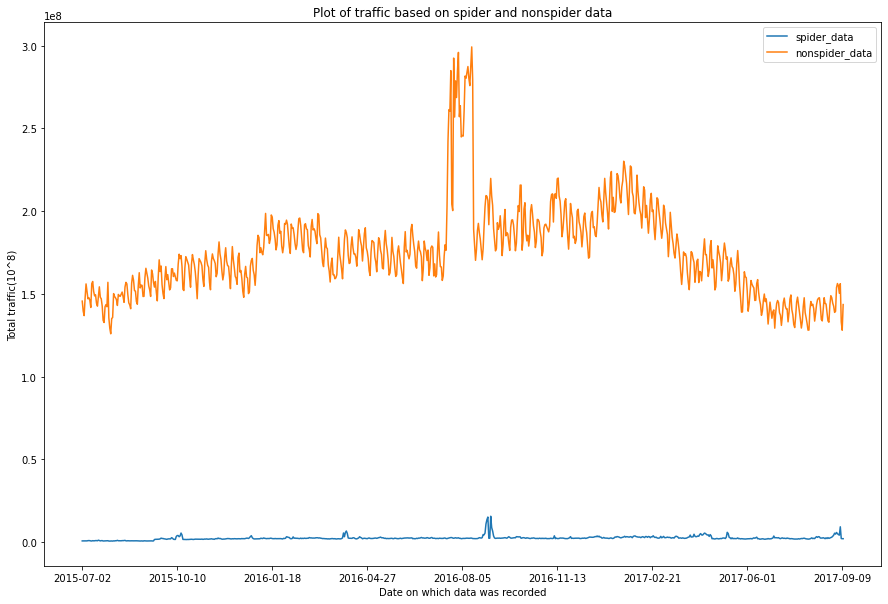

In [108]:
new_data.transpose().plot(figsize=(15,10),title='Plot of traffic based on spider and nonspider data')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()


We can clearly see the pattern in nonspider data but spider data is almost a flat line but in actual it should not be.
Conclusion- This implies that the scale of spider and non-spider data is very different or may be the scale id ifferent for both the case.

In [109]:
print('Median of spider data is : ',np.median(new_data.transpose().spider_data))
print('Median of nonspider data is : ',np.median(new_data.transpose().nonspider_data))

Median of spider data is :  2159977.2614306607
Median of nonspider data is :  173407051.78514737


These differ at a scale of 10^2, it is a large difference.

This may be due to the fact that generally whenever we need any information from the wikipedia, we directly access the wiki page instead of using a web scrawler. Web scrapping or web scrawler is generally used only when we need to extract a large amount of data at once

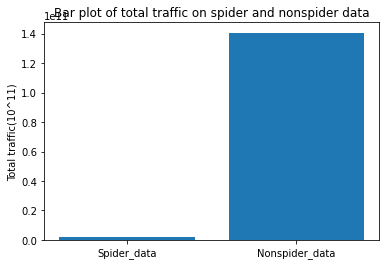

In [110]:
a=np.sum(new_data.transpose().spider_data)
b=np.sum(new_data.transpose().nonspider_data)
plt.bar(['Spider_data','Nonspider_data'],[a,b])
plt.title('Bar plot of total traffic on spider and nonspider data')
plt.ylabel('Total traffic(10^11)')
plt.show()



This plot makes it more clear, total traffic on spider data is almost negligible in comparision to nonspider data.


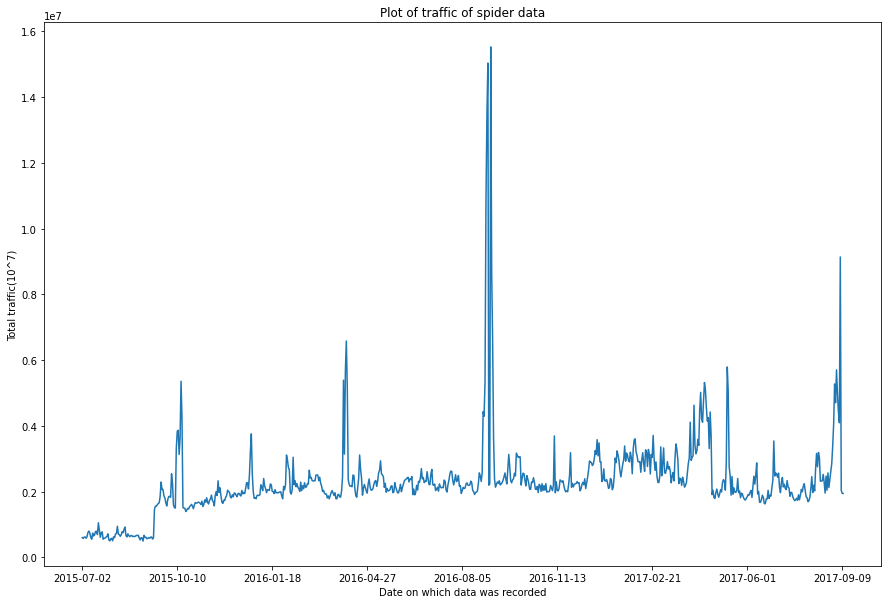

In [111]:
new_data.iloc[0].transpose().plot(figsize=(15,10),title='Plot of traffic of spider data')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()


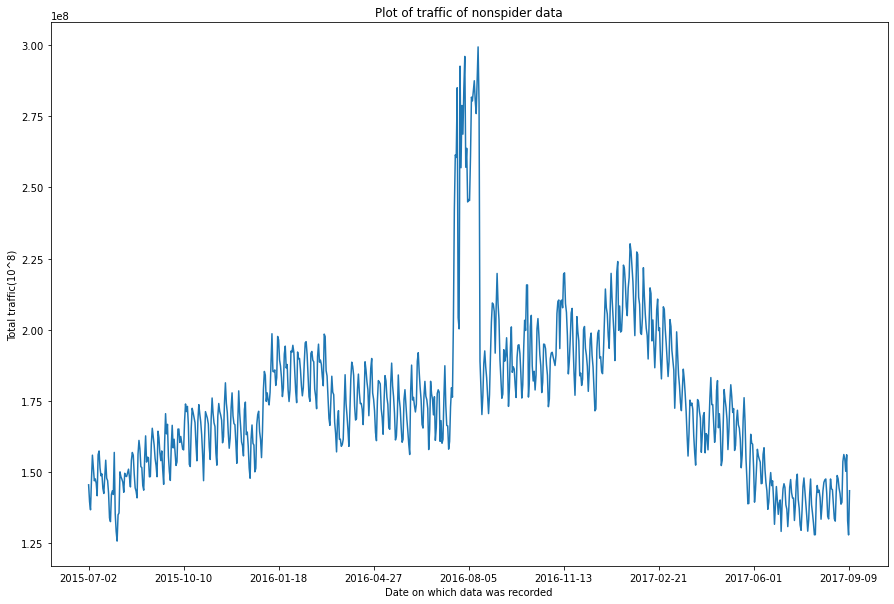

In [112]:
new_data.iloc[1].transpose().plot(figsize=(15,10),title='Plot of traffic of nonspider data')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()



In [113]:
# # It is similar to english wikipedia data as most of the data is from english language.
# Also, thersi some patter i.e upward trend for few month,s downward trend for last few months

# ad most if te data is non - spider

# EDA based on access of wikipedia page

In [114]:
access_data_list=[]
access_number=[0,0,0]
for i in range(3):
    access_data_list.append(np.zeros(training_data.shape[1]-1))
import re
for i in range(len(Page_name)):
    add_list=training_data.iloc[i].values[1:]
    k=max([i.start() for i in re.finditer('org_',Page_name[i])])  
    if('all-access' in Page_name[i][k:]):
        access_data_list[0]=list(map(add,access_data_list[0],add_list))
        access_number[0]=access_number[0] + 1
    if('desktop' in Page_name[i][k:]):
        access_data_list[1]=list(map(add,access_data_list[1],add_list))
        access_number[1]=access_number[1] + 1
    if('mobile' in Page_name[i][k:]): 
        access_data_list[2]=list(map(add,access_data_list[2],add_list))
        access_number[2]=access_number[2] + 1


In [115]:
access_data=pd.DataFrame(access_data_list,index=['all-accesss','desktop','mobile'],columns=training_data.columns.values[1:])
access_data.head(10)

2015-07-02    2015-07-03    2015-07-04    2015-07-05  \
all-accesss  7.354257e+07  7.059936e+07  7.100144e+07  7.487511e+07   
desktop      3.921677e+07  3.563952e+07  3.287557e+07  3.466063e+07   
mobile       3.342033e+07  3.392898e+07  3.355425e+07  3.846052e+07   

               2015-07-06    2015-07-07    2015-07-08    2015-07-09  \
all-accesss  7.910434e+07  7.666721e+07  7.455307e+07  7.493972e+07   
desktop      4.248410e+07  4.152947e+07  3.925837e+07  3.978240e+07   
mobile       3.498322e+07  3.374199e+07  3.394156e+07  3.374518e+07   

               2015-07-10    2015-07-11  ...    2017-09-01    2017-09-02  \
all-accesss  7.392446e+07  7.183230e+07  ...  7.420541e+07  7.419053e+07   
desktop      3.907183e+07  3.408589e+07  ...  3.975949e+07  3.663173e+07   
mobile       3.383940e+07  3.643159e+07  ...  3.009145e+07  3.333625e+07   

               2017-09-03    2017-09-04    2017-09-05    2017-09-06  \
all-accesss  8.247265e+07  8.304668e+07  8.153629e+07  7.911704e+07   
desktop      4.008453e+07  4.454256e+07  4.562150e+07  4.440677e+07   
mobile       3.689493e+07  3.361682e+07  3.205307e+07  3.088625e+07   

               2017-09-07    2017-09-08    2017-09-09    2017-09-10  
all-accesss  8.658712e+07  6.844128e+07  6.588415e+07  7.339372e+07  
desktop      4.809966e+07  3.623419e+07  3.110623e+07  3.565932e+07  
mobile       3.058052e+07  3.034936e+07  3.294982e+07  3.639682e+07  

[3 rows x 802 columns]

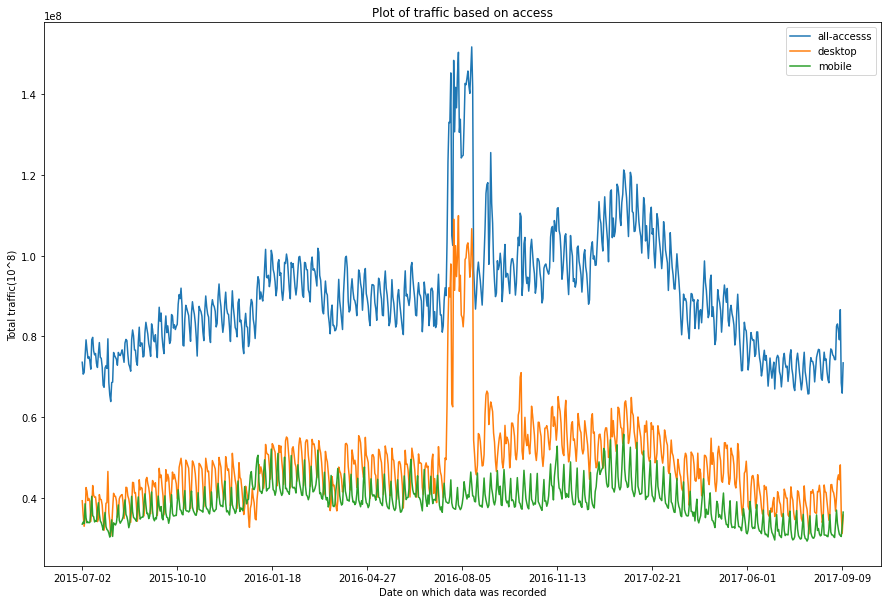

In [116]:
access_data.transpose().plot(figsize=(15,10),title='Plot of traffic based on access')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()

All of them  have a pattern very similar to English language wiki or similar to non spider data pattern. 
Now, we can see that all-access and desktop traffic live upto our expectation 

but mobile data shows a very different pattern, around August 2016, all-access and desktop data shows a peak just like English wiki but mobile data doesn't show any spike and if we look closely it is actually going down. This pattern is completely opposite of what we expected.



Conclusion- From this we can conclude that most of the mobile traffic during Aug 2016 is due to the Spanish and German wiki and very less English wiki is accessed on Mobile.

# Which month has more visits on average?

In [117]:
month=[]
for i in range(12):
    k=[]
    month.append(k)
for col in (training_data.columns[1:]):
    index=int(col.split('-')[1])
    print(col)
    print(index)
    print(training_data[col].values)
    print(np.median(training_data[col].values))
    
    month[index-1].append(np.median(training_data[col].values))
    


2015-07-02
7
[11. 14.  0. ...  0.  0.  0.]
57.0
2015-07-03
7
[ 5. 15.  1. ...  0.  0.  0.]
54.0
2015-07-04
7
[13. 18.  1. ...  0.  0.  0.]
55.0
2015-07-05
7
[14. 11.  0. ...  0.  0.  0.]
58.0
2015-07-06
7
[ 9. 13.  4. ...  0.  0.  0.]
58.0
2015-07-07
7
[ 9. 22.  0. ...  0.  0.  0.]
61.0
2015-07-08
7
[22. 11.  3. ...  0.  0.  0.]
62.0
2015-07-09
7
[26. 10.  4. ...  0.  0.  0.]
61.0
2015-07-10
7
[24.  4.  4. ...  0.  0.  0.]
59.0
2015-07-11
7
[19. 41.  1. ...  0.  0.  0.]
54.0
2015-07-12
7
[10. 65.  1. ...  0.  0.  0.]
58.0
2015-07-13
7
[14. 57.  1. ...  0.  0.  0.]
62.0
2015-07-14
7
[15. 38.  6. ...  0.  0.  0.]
62.0
2015-07-15
7
[ 8. 20.  8. ...  0.  0.  0.]
60.0
2015-07-16
7
[16. 62.  6. ...  0.  0.  0.]
61.0
2015-07-17
7
[ 8. 44.  4. ...  0.  0.  0.]
60.0
2015-07-18
7
[ 8. 15.  5. ...  0.  0.  0.]
55.0
2015-07-19
7
[16. 10.  1. ...  0.  0.  0.]
61.0
2015-07-20
7
[ 7. 47.  2. ...  0.  0.  0.]
64.0
2015-07-21
7
[11. 24.  3. ...  0.  0.  0.]
60.0
2015-07-22
7
[10. 17.  8. ...  0.  0.  0

103.0
2016-01-03
1
[ 6. 14.  3. ...  0.  0.  0.]
111.0
2016-01-04
1
[19. 14.  3. ...  0.  0.  0.]
111.0
2016-01-05
1
[20. 11.  3. ...  0.  0.  0.]
111.0
2016-01-06
1
[19. 13.  4. ...  0.  0.  0.]
112.0
2016-01-07
1
[22. 12.  4. ...  0.  0.  0.]
109.0
2016-01-08
1
[30. 12.  8. ...  0.  0.  0.]
109.0
2016-01-09
1
[14. 24.  3. ...  0.  0.  0.]
110.0
2016-01-10
1
[16. 15.  5. ...  0.  0.  0.]
118.0
2016-01-11
1
[22. 38.  8. ...  0.  0.  0.]
114.0
2016-01-12
1
[15. 18.  1. ...  0.  0.  0.]
110.0
2016-01-13
1
[15. 26.  4. ...  0.  0.  0.]
109.0
2016-01-14
1
[26. 15.  0. ...  0.  0.  0.]
108.0
2016-01-15
1
[16. 12.  3. ...  0.  0.  0.]
106.0
2016-01-16
1
[13. 14.  6. ...  0.  0.  0.]
107.0
2016-01-17
1
[27. 40.  3. ...  0.  0.  0.]
118.0
2016-01-18
1
[18. 19.  1. ...  0.  0.  0.]
112.0
2016-01-19
1
[13. 13.  3. ...  0.  0.  0.]
112.0
2016-01-20
1
[32. 39.  3. ...  0.  0.  0.]
113.0
2016-01-21
1
[31. 19.  3. ...  0.  0.  0.]
114.0
2016-01-22
1
[16. 16.  1. ...  0.  0.  0.]
112.0
2016-01-23
1
[

2016-07-03
7
[15. 12.  2. ...  0.  0.  0.]
126.0
2016-07-04
7
[16. 28.  4. ...  0.  0.  0.]
126.0
2016-07-05
7
[18. 28.  3. ...  0.  0.  0.]
126.0
2016-07-06
7
[21. 17.  4. ...  0.  0.  0.]
124.0
2016-07-07
7
[15. 27.  2. ...  0.  0.  0.]
118.0
2016-07-08
7
[30. 48.  0. ...  0.  0.  0.]
123.0
2016-07-09
7
[115. 184.   1. ...   0.   0.   0.]
122.0
2016-07-10
7
[56. 64.  3. ...  0.  0.  0.]
122.0
2016-07-11
7
[45. 24. 12. ...  0.  0.  0.]
127.0
2016-07-12
7
[17. 92.  4. ...  0.  0.  0.]
128.0
2016-07-13
7
[18. 31.  7. ...  0.  0.  0.]
126.0
2016-07-14
7
[15. 34.  5. ...  0.  0.  0.]
127.0
2016-07-15
7
[18. 49.  6. ...  0.  0.  0.]
120.0
2016-07-16
7
[14. 21.  6. ...  0.  0.  0.]
117.0
2016-07-17
7
[15. 36.  6. ...  0.  0.  0.]
129.0
2016-07-18
7
[15. 32.  3. ...  0.  0.  0.]
132.0
2016-07-19
7
[24. 16.  3. ...  0.  0.  0.]
125.0
2016-07-20
7
[22. 16.  3. ...  0.  0.  0.]
123.0
2016-07-21
7
[18. 19.  5. ...  0.  0.  0.]
126.0
2016-07-22
7
[30. 22.  5. ...  0.  0.  0.]
122.0
2016-07-23
7
[

2017-01-02
1
[42. 58.  8. ...  0.  0.  0.]
160.0
2017-01-03
1
[35. 47. 12. ...  0.  0.  0.]
158.0
2017-01-04
1
[13. 10.  3. ...  0.  0.  0.]
161.0
2017-01-05
1
[51. 29.  5. ...  0.  0.  0.]
157.0
2017-01-06
1
[11. 79. 10. ...  0.  0.  0.]
156.0
2017-01-07
1
[12. 21.  4. ...  0.  0.  0.]
161.0
2017-01-08
1
[31. 39.  1. ...  0.  0.  0.]
176.0
2017-01-09
1
[15. 16. 17. ...  0.  0.  0.]
167.0
2017-01-10
1
[ 4. 37.  3. ...  0.  0.  0.]
157.0
2017-01-11
1
[22. 19.  4. ...  0.  0.  0.]
155.0
2017-01-12
1
[12.  8.  2. ...  0.  0.  0.]
152.0
2017-01-13
1
[12. 13.  4. ...  0.  0.  0.]
152.0
2017-01-14
1
[11. 37.  2. ...  0.  0.  0.]
159.0
2017-01-15
1
[ 4. 20.  0. ...  0.  0.  0.]
170.0
2017-01-16
1
[12. 12.  6. ...  0.  0.  0.]
156.0
2017-01-17
1
[13. 17.  6. ...  0.  0.  0.]
154.0
2017-01-18
1
[13. 11.  6. ...  0.  0.  0.]
154.0
2017-01-19
1
[56. 11.  2. ...  0.  0.  0.]
152.0
2017-01-20
1
[47. 12.  3. ...  0.  0.  0.]
150.0
2017-01-21
1
[120.  35.   7. ...   0.   0.   0.]
153.0
2017-01-22
1
[

2017-07-08
7
[29. 20.  1. ... 16.  4.  2.]
108.0
2017-07-09
7
[22. 76.  2. ... 10.  7.  1.]
117.0
2017-07-10
7
[25. 24.  6. ... 22.  5.  4.]
116.0
2017-07-11
7
[20. 15.  5. ... 15.  2. 10.]
114.0
2017-07-12
7
[19. 12.  1. ... 11.  2.  3.]
113.0
2017-07-13
7
[25. 16.  7. ... 77.  3.  4.]
111.0
2017-07-14
7
[17. 15.  2. ... 35.  6.  3.]
109.0
2017-07-15
7
[12. 34.  1. ... 27.  5.  3.]
108.0
2017-07-16
7
[24. 16.  2. ... 16.  6.  1.]
119.0
2017-07-17
7
[38. 16.  3. ...  9.  0.  1.]
117.0
2017-07-18
7
[43. 19.  1. ...  7.  4.  1.]
112.0
2017-07-19
7
[17. 13.  3. ... 22.  0.  1.]
110.0
2017-07-20
7
[16. 15.  2. ...  6.  3.  1.]
111.0
2017-07-21
7
[16. 23.  2. ...  8.  8.  1.]
108.0
2017-07-22
7
[12. 16.  3. ...  5.  4.  4.]
110.0
2017-07-23
7
[20. 11.  5. ...  7.  8.  5.]
118.0
2017-07-24
7
[16. 44.  8. ... 17.  4.  3.]
117.0
2017-07-25
7
[31. 18.  2. ... 31.  7.  3.]
117.0
2017-07-26
7
[19. 13.  3. ... 15.  2.  9.]
114.0
2017-07-27
7
[14. 12.  3. ... 16. 16.  0.]
114.0
2017-07-28
7
[20.  8

In [118]:
sum(month[1])

7750.0

In [119]:
for i in range(len(month)):
    month[i]=np.median(month[i])
print(month)
print('Month with most number of average visitor is ', month.index(max(month)))    


# i.e Feb is most number of average visisots

[129.0, 129.0, 130.0, 130.5, 126.0, 122.02352941176471, 113.0, 116.0, 115.5, 107.5, 109.0, 111.0]
Month with most number of average visitor is  3


# Which day of the week has more visits on an average ?

In [120]:
week_day=[]
import datetime
for i in range(7):
    k=[]
    week_day.append(k)
for col in (training_data.columns[1:]):
    index=datetime.datetime.strptime(' '.join(col.split('-')), '%Y %m %d').weekday() 
    week_day[index].append(np.median(training_data[col].values))

In [121]:
import calendar
for i in range(len(week_day)):
    week_day[i]=np.median(week_day[i])
print(week_day)    
print('Day with maximum average visitors: ',calendar.day_name[week_day.index(max(week_day))])

[126.0, 125.0, 123.0, 121.0, 118.0, 120.0, 129.0]
Day with maximum average visitors:  Sunday


# Does weekend has more visitors than weekdays on an average ?

In [122]:
print('Average Visitors on week day : ',np.median(week_day[0]+week_day[1]+week_day[2]+week_day[3]+week_day[4]))
print('Average Visitors on weekend : ',np.median(week_day[5]+week_day[6]))

Average Visitors on week day :  613.0
Average Visitors on weekend :  249.0


# Feature Engineering 

As we saw during EDA that usually peaks are present at regular intervals and there are very less number of peaks that are very large and occur only once or twice.
These peaks will not be useful for prediction, so we are replacing all these peaks with the median of the data

In [123]:
col=training_data.columns

for i in range(training_data.shape[0]):
    k=training_data.iloc[i].values[1:]
    threshold=np.percentile(k,99.8)
#     Using median
    med=np.median(k)
    for j in col[1:]:
        if(training_data.at[i,j]>threshold):
            training_data.at[i,j]=med


In [124]:
training_data.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2017-09-01  \
0         9.0        22.0        26.0        24.0  ...        19.0   
1        22.0        11.0        10.0         4.0  ...        32.0   
2         0.0         3.0         4.0         4.0  ...         6.0   
3        14.0         9.0        11.0        16.0  ...         7.0   
4         0.0         0.0         0.0         0.0  ...        16.0   

   2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0        33.0        33.0        18.0        16.0        27.0        29.0   
1        30.0        11.0        19.0        54.0        25.0        26.0   
2         6.0         7.0         2.0         4.0         7.0         3.0   
3        19.0        19.0         9.0         6.0        16.0        19.0   
4        16.0        19.0         9.0        20.0        23.0        28.0   

   2017-09-08  2017-09-09  2017-09-10  
0        23.0        54.0        38.0  
1        23.0        13.0        81.0  
2         4.0         7.0         6.0  
3        30.0        38.0         4.0  
4        14.0         8.0         7.0  

[5 rows x 803 columns]

# BaseLine model



Now, we will use median of data to make predictions, for each page we have taken median for each weekday and used it to make predictions for the next 62 days accordingly.


In [81]:
week_day=[[[] for j in range(7)] for i in range(training_data.shape[0])]

In [82]:
week_day

In [85]:
training_data.columns[1:]

In [ ]:
week_day=[[[] for j in range(7)] for i in range(training_data.shape[0])]
for i in (training_data.columns[1:]):
    index=datetime.datetime.strptime(' '.join(i.split('-')), '%Y %m %d').weekday()
    print(index)
    for k in range(training_data.shape[0]):
        print(training_data.at[k,i])
        week_day[k][index].append(training_data.at[k,i])

In [413]:
training_data

In [414]:
len(week_day)

In [421]:
for i in range(len(week_day)):
    for j in range(7):
        week_day[i][j]=np.median(week_day[i][j])


In [423]:
len(week_day)

In [424]:
week_day

In [427]:
file1=pd.read_csv('data/key_2.csv')

In [428]:
file1

In [429]:
file2=pd.read_csv('data/sample_submission_2.csv')

In [431]:
file1=file1.merge(file2,on='Id')
file1.head()

In [432]:
training_data

In [438]:
for i in range(training_data.shape[0]):
    date = datetime.date(2017,9,13)
    for j in range(62):
        k=date.weekday()
        name=Page_name[i] + '_' + str(date)
        print(week_day[i][k])
        print(i)
        print(k)
        print(name)
        break
    break

In [ ]:
ids=file1['Page'].values
visits={} 
for i in range(training_data.shape[0]):
    date = datetime.date(2017,9,13)
    for j in range(62):
        k=date.weekday()
        name=Page_name[i] + '_' + str(date)
        visits[name]=week_day[i][k]
        date += datetime.timedelta(days=1)
        print(week_day[i][k])
        print(i)
        print(k)
        print(name)


# Feature engineering  

In [125]:
training_data

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
0             18.0        11.0         5.0        13.0        14.0   
1             11.0        14.0        15.0        18.0        11.0   
2              1.0         0.0         1.0         1.0         0.0   
3             35.0        13.0        10.0        94.0         4.0   
4              0.0         0.0         0.0         0.0         0.0   
...            ...         ...         ...         ...         ...   
145058         0.0         0.0         0.0         0.0         0.0   
145059         0.0         0.0         0.0         0.0         0.0   
145060         0.0         0.0         0.0         0.0         0.0   
145061         0.0         0.0         0.0         0.0         0.0   
145062         0.0         0.0         0.0         0.0         0.0   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  \
0              9.0         9.0        22.0        26.0        24.0  ...   
1             13.0        22.0        11.0        10.0         4.0  ...   
2              4.0         0.0         3.0         4.0         4.0  ...   
3             26.0        14.0         9.0        11.0        16.0  ...   
4              0.0         0.0         0.0         0.0         0.0  ...   
...            ...         ...         ...         ...         ...  ...   
145058         0.0         0.0         0.0         0.0         0.0  ...   
145059         0.0         0.0         0.0         0.0         0.0  ...   
145060         0.0         0.0         0.0         0.0         0.0  ...   
145061         0.0         0.0         0.0         0.0         0.0  ...   
145062         0.0         0.0         0.0         0.0         0.0  ...   

        2017-09-01  2017-09-02  2017-09-03  2017-09-04  2017-09-05  \
0             19.0        33.0        33.0        18.0        16.0   
1             32.0        30.0        11.0        19.0        54.0   
2              6.0         6.0         7.0         2.0         4.0   
3              7.0        19.0        19.0         9.0         6.0   
4             16.0        16.0        19.0         9.0        20.0   
...            ...         ...         ...         ...         ...   
145058         0.0         4.0         3.0         6.0         5.0   
145059         4.0         4.0         7.0         5.0         0.0   
145060        11.0        25.0        22.0        47.0        42.0   
145061         4.0         6.0         5.0         1.0         5.0   
145062         2.0        29.0         6.0         5.0         2.0   

        2017-09-06  2017-09-07  2017-09-08  2017-09-09  2017-09-10  
0             27.0        29.0        23.0        54.0        38.0  
1             25.0        26.0        23.0        13.0        81.0  
2              7.0         3.0         4.0         7.0         6.0  
3             16.0        19.0        30.0        38.0         4.0  
4             23.0        28.0        14.0         8.0         7.0  
...            ...         ...         ...         ...         ...  
145058         2.0         4.0         4.0         8.0         2.0  
145059         5.0         5.0         2.0         2.0         4.0  
145060        13.0         9.0        21.0        16.0         6.0  
145061         8.0         2.0         4.0         3.0         3.0  
145062         2.0         7.0         6.0        10.0         3.0  

[145063 rows x 803 columns]

In [126]:
# Week day feature as 7 day lag was significant

In [127]:
week_day=[] 
temp_week=[]

In [128]:
l=len(training_data.columns)
for i in (training_data.columns[l-15:l]): 
    d=i.split('-')
    date=datetime.date(int(d[0]),int(d[1]),int(d[2]))
    temp_week.append(date.weekday())

In [129]:
threedays_1=[] #  t-3 to t days
threedays_2=[] #  t-6 to t-3 days
threedays_3=[] #  t-9 to t-6 days

weekly_trend=[] 
target_value=[]

for j in (range(training_data.shape[0])):
    k=training_data.iloc[j].values
  
  
    weekly_temp=[]
    for i in range(788,803):
        weekly_temp.append(k[i-7])
    weekly_trend.extend(weekly_temp)  
  
  
    temp_list=[]
    temp_list1=[]
    temp_list2=[]
    for i in range(788,803):
        temp_list.append(k[i-1]+k[i-2]+k[i-3])
        temp_list1.append(k[i-4]+k[i-5]+k[i-6])
        temp_list2.append(k[i-7]+k[i-8]+k[i-9])
        target_value.append(k[i])
    threedays_1.extend(temp_list) 
    threedays_2.extend(temp_list1)
    threedays_3.extend(temp_list2) 
    
  
  
    week_day.extend(temp_week)

In [130]:
# Since language as impact on traffic - > use language as feature

lang_feat=[] 
for k in (Page_name):
    index=k.find('.wikipedia')
    temp_lang=[]

    for i in range(15):
        temp_lang.append(lang_list.index(k[index-1:index-3:-1][::-1]))
    lang_feat.extend(temp_lang)  


In [131]:
spider_feat=[] # 1 - spider data and 0 - non spider data
for i in range(len(Page_name)):
    temp_spider=[]
    if('spider' in Page_name[i]):
        for k in range(15):
            temp_spider.append(1)
    else:
        for k in range(15):
            temp_spider.append(0)
    spider_feat.extend(temp_spider)    


In [132]:
# 0 -  all access, 1 - desktop and 2 - mobile 
access_feat=[] 
import re
for i in range(len(Page_name)):
    temp_access=[]
    k=max([i.start() for i in re.finditer('org_',Page_name[i])])  
    if('all-access' in Page_name[i][k:]):
        for j in range(15):
            temp_access.append(0)
    if('desktop' in Page_name[i][k:]):
        for j in range(15):
            temp_access.append(1)
    if('mobile' in Page_name[i][k:]): 
        for j in range(15):
            temp_access.append(2)
    access_feat.extend(temp_access)    


Now,we will create features based on fourier transformation. As we saw during analysis that there were some unneccessary peaks at the start.

so, after removing some initial values, we will take top 3 peaks and use them as features
These 6 list will contain the X and Y co-ordinates for top 3 peaks

In [133]:
Page_name

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

In [134]:
# for t in range(len(Page_name)):
    
#     data=training_data.iloc[t].values 
#     data=data-np.mean(data) 
#     x=fft.fft(data) 
#     freq=np.linspace(0,803//2,803//2) 
#     y=2/803*np.abs(x[0:803//2]) 
    
#     print(y.shape)

#     temp=y.copy()
#     temp1=temp[15:]
#     print(temp1.shape)
#     print(temp1)
#     temp1=np.sort(temp1)
    
#     k=temp1[len(temp1)-3:]
#     print(k)
#     break

In [136]:
from scipy import fft

fourier_feat1_x=[]
fourier_feat2_x=[]
fourier_feat3_x=[]
fourier_feat1_y=[]
fourier_feat2_y=[]
fourier_feat3_y=[]

for t in range(len(Page_name)):
    
    data=training_data.iloc[t].values 
    data=data-np.mean(data) 
    x=fft.fft(data) 
    freq=np.linspace(0,803//2,803//2) 
    y=2/803*np.abs(x[0:803//2]) 

    temp=y.copy()
#     values asfter 15
    temp1=temp[15:]
    temp1=np.sort(temp1)
    
#     get 3 highest peaks to be used as feature
    k=temp1[len(temp1)-3:]
    fourier_temp1_x=[]
    fourier_temp2_x=[]
    fourier_temp3_x=[]
    fourier_temp1_y=[]
    fourier_temp2_y=[]
    fourier_temp3_y=[]
    
    for i in range(len(k)):
        temp_fourier_x=[]
        temp_fourier_y=[]
        temp_fourier_x.append(freq[list(y).index(k[i])])
        temp_fourier_y.append(list(y).index(k[i]))
        if(i==0):
            for j in range(15):
                fourier_temp1_x.extend(temp_fourier_x)
                fourier_temp1_y.extend(temp_fourier_y)
        if(i==1):
            for j in range(15):
                fourier_temp2_x.extend(temp_fourier_x)
                fourier_temp2_y.extend(temp_fourier_y)
        if(i==2):
            for j in range(15):
                fourier_temp3_x.extend(temp_fourier_x)
                fourier_temp3_y.extend(temp_fourier_y)
    fourier_feat1_x.extend(fourier_temp1_x) 
    fourier_feat2_x.extend(fourier_temp2_x) 
    fourier_feat3_x.extend(fourier_temp3_x)    
    fourier_feat1_y.extend(fourier_temp1_y) 
    fourier_feat2_y.extend(fourier_temp2_y) 
    fourier_feat3_y.extend(fourier_temp3_y)   


In [137]:
monthly_trend=[] 
quarterly_trend=[] 
yearly_trend=[]
for j in (range(training_data.shape[0])):
    k=training_data.iloc[j].values

    temp_monthly=[]
    temp_quarterly=[]
    temp_yearly=[]
    
    for i in range(788,803):
        temp_monthly_med=[]
        temp_monthly_med.append(np.median([k[i-28],k[i-29],k[i-30],k[i-31],k[i-32]])) #  median of traffic on 28,29,30,31,32 days ago.
        temp_monthly_med.append(np.median([k[i-58],k[i-59],k[i-60],k[i-61],k[i-62]])) #  median of traffic on 58,59,60,61,62 days ago.
        temp_monthly_med.append(np.median([k[i-88],k[i-89],k[i-90],k[i-91],k[i-92]])) #  median of traffic on 88,89,90,91,92 days ago.
        temp_monthly.append(np.mean(temp_monthly_med))

# Seasonality in data i.e 120, 230 days.
        temp_quarterly_med=[]
        temp_quarterly_med.append(np.median([k[i-118],k[i-119],k[i-120],k[i-121],k[i-122]])) # median of traffic on 118,119,120,121,122 days ago.
        temp_quarterly_med.append(np.median([k[i-228],k[i-229],k[i-230],k[i-231],k[i-232]])) # median of traffic on 228,229,230,231,232 days ago.
        temp_quarterly_med.append(np.median([k[i-338],k[i-339],k[i-340],k[i-341],k[i-342]])) # median of traffic on 338,339,340,341,342 days ago.
        temp_quarterly.append(np.mean(temp_quarterly_med))

# Yearly data 
        temp_yearly_med=[]
        temp_yearly_med.append(np.median([k[i-363],k[i-364],k[i-365],k[i-366],k[i-367]]))
        temp_yearly_med.append(np.median([k[i-728],k[i-729],k[i-730],k[i-731],k[i-732]]))
        temp_yearly.append(np.mean(temp_yearly_med))


    monthly_trend.extend(temp_monthly)
    quarterly_trend.extend(temp_quarterly)
    yearly_trend.extend(temp_yearly)


In [138]:
# Modeling

In [139]:
from sklearn.preprocessing import OneHotEncoder,normalize
enc_access_feat = OneHotEncoder(sparse=False)
access_feat_ohe=enc_access_feat.fit_transform(np.array(access_feat).reshape(-1,1))

In [140]:
enc_week_day = OneHotEncoder(sparse=False)
week_day_ohe=enc_week_day.fit_transform(np.array(week_day).reshape(-1,1))

In [141]:
enc_lang_feat = OneHotEncoder(sparse=False)
lang_feat_ohe=enc_lang_feat.fit_transform(np.array(lang_feat).reshape(-1,1))


In [142]:
enc_spider_feat = OneHotEncoder(sparse=False)
spider_feat_ohe=enc_spider_feat.fit_transform(np.array(spider_feat).reshape(-1,1))


In [143]:
weekly_trend=normalize(np.array(weekly_trend).reshape(-1,1),axis=0)
threedays_1=normalize(np.array(threedays_1).reshape(-1,1),axis=0)
threedays_2=normalize(np.array(threedays_2).reshape(-1,1),axis=0)
threedays_3=normalize(np.array(threedays_3).reshape(-1,1),axis=0)
fourier_feat1_x=normalize(np.array(fourier_feat1_x).reshape(-1,1),axis=0)
fourier_feat2_x=normalize(np.array(fourier_feat2_x).reshape(-1,1),axis=0)
fourier_feat3_x=normalize(np.array(fourier_feat3_x).reshape(-1,1),axis=0)
fourier_feat1_y=normalize(np.array(fourier_feat1_y).reshape(-1,1),axis=0)
fourier_feat2_y=normalize(np.array(fourier_feat2_y).reshape(-1,1),axis=0)
fourier_feat3_y=normalize(np.array(fourier_feat3_y).reshape(-1,1),axis=0)


In [144]:
target_value=np.array(target_value).reshape(-1,1) 

In [145]:
target_value

array([[47.],
       [44.],
       [26.],
       ...,
       [ 6.],
       [10.],
       [ 3.]])

In [146]:
data=np.column_stack((week_day_ohe,weekly_trend,threedays_1,threedays_2,threedays_3,lang_feat_ohe,spider_feat_ohe,access_feat_ohe,\
               fourier_feat1_x,fourier_feat2_x,fourier_feat3_x,fourier_feat1_y,fourier_feat2_y,fourier_feat3_y))

In [147]:
data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.71654375e-03, 3.79432208e-04, 1.47232484e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.71654375e-03, 3.79432208e-04, 1.47232484e-04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.71654375e-03, 3.79432208e-04, 1.47232484e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.52434387e-04, 1.71818358e-04, 1.23985250e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.52434387e-04, 1.71818358e-04, 1.23985250e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.52434387e-04, 1.71818358e-04, 1.23985250e-04]])

In [148]:
indices = np.random.permutation(data.shape[0])
training_idx, test_idx = indices[:int(0.75*data.shape[0])], indices[int(0.75*data.shape[0]):]
x_train,x_test = data[training_idx,:], data[test_idx,:]
y_train,y_test=target_value[training_idx,:],target_value[test_idx,:]



In [149]:
y_train=y_train.reshape(y_train.shape[0])
y_test=y_test.reshape(y_test.shape[0])


In [150]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from operator import sub,truediv,add
from sklearn.ensemble import RandomForestRegressor

In [151]:
def smape(actual,visits):
    temp_list=[2 for i in range(len(actual))]
    val1=np.abs(list(map(sub,visits,actual)))
    val2=list(map(add,np.abs(actual),np.abs(visits)))
    val4=list(map(truediv,val2,temp_list))
    val3=[]
    for i in range(len(val4)):
        if(val4[i]==0):
            val3.append(0)
        else:    
            val3.append(val1[i]/val4[i])
    return(np.sum(val3)/len(val3))    


In [171]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
score=smape(y_test,pred)
print('smape on LinearRegression is: ',score)

smape on LinearRegression is:  0.7600914505713967




These are not good results, we should try more powerful alogorithm and see how these performs.


In [173]:
max_depth=[10,50,500,1000]
min_samples_split=[2,5,10,50,100,500]
reg= DecisionTreeRegressor()
random_grid={'max_depth':max_depth,'min_samples_split':min_samples_split}
rf_random = GridSearchCV(estimator = reg,scoring=make_scorer(smape,greater_is_better=False), param_grid = random_grid, \
                                cv = 3, verbose=30, n_jobs = -1)
rf_random.fit(x_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 500, 1000],
                         'min_samples_split': [2, 5, 10, 50, 100, 500]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=30)

In [174]:
rf_random.best_params_ 

{'max_depth': 500, 'min_samples_split': 10}

In [175]:
rf_random.cv_results_

{'mean_fit_time': array([18.30538305, 18.32702398, 17.52847552, 15.72915777, 15.63150231,
        15.14803036, 46.12405459, 45.89930701, 44.8576448 , 44.4287533 ,
        43.87785474, 43.08420173, 52.96350606, 51.27084295, 50.07945363,
        48.52825793, 47.73152312, 46.36016877, 52.68587621, 50.7374026 ,
        50.07708168, 48.40356127, 44.82351613, 39.19938135]),
 'std_fit_time': array([0.13783703, 0.06366127, 1.16326451, 0.09619906, 0.06475132,
        0.3743894 , 0.09053797, 0.27967241, 0.50403996, 0.28122584,
        0.10521043, 0.49795045, 0.34240689, 0.1059493 , 0.67546206,
        0.55280864, 0.48348946, 0.56855124, 0.10684508, 0.27150986,
        0.47108387, 0.52386592, 0.5100051 , 1.35254517]),
 'mean_score_time': array([0.79999463, 0.83579373, 0.82783842, 0.71532973, 0.71569133,
        0.68851455, 1.19980105, 1.11892041, 1.22824399, 1.03471096,
        1.0049425 , 0.841784  , 1.75004228, 1.47182568, 1.30367104,
        1.13643066, 1.08674121, 0.92008996, 1.67297498, 1.37

In [177]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor(random_state=0,max_depth=500,min_samples_split=10)
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
score=smape(y_test,pred)
print('smape on DT with best hyperparameter is: ',score)



smape on DT with best hyperparameter is:  0.4082479275467747


# Random Forest

In [179]:
from sklearn.ensemble import RandomForestRegressor
reg= RandomForestRegressor(random_state=0,max_depth=1000,min_samples_split=10)
n_estimators=[50,100,250]
random_grid={'n_estimators':n_estimators}
rf_random = GridSearchCV(estimator = reg,scoring=make_scorer(smape,greater_is_better=False), param_grid = random_grid, \
                                cv = 3, verbose=20,n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START n_estimators=50.............................................
[CV 1/3; 1/3] END .............n_estimators=50;, score=-0.388 total time=30.4min
[CV 3/3; 1/3] START n_estimators=50.............................................
[CV 3/3; 1/3] END .............n_estimators=50;, score=-0.386 total time=30.4min
[CV 2/3; 2/3] START n_estimators=100............................................
[CV 2/3; 2/3] END ............n_estimators=100;, score=-0.387 total time=55.9min
[CV 3/3; 2/3] START n_estimators=100............................................
[CV 3/3; 2/3] END ............n_estimators=100;, score=-0.386 total time=55.9min
[CV 1/3; 2/3] START n_estimators=100............................................
[CV 1/3; 2/3] END ............n_estimators=100;, score=-0.387 total time=56.0min
[CV 1/3; 3/3] START n_estimators=250............................................
[CV 1/3; 3/3] END ...........n_estimators=250;, sc

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=1000,
                                             min_samples_split=10,
                                             random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 250]},
             scoring=make_scorer(smape, greater_is_better=False), verbose=20)

In [180]:
rf_random.best_params_

{'n_estimators': 250}

In [152]:
# Training Random Forest with best hyperparameters
reg= RandomForestRegressor(random_state=0,max_depth=1000,min_samples_split=10,n_estimators=250)
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
score=smape(y_test,pred)
print('smape on RF  with best hyperparameter is: ',score)

smape on RF  with best hyperparameter is:  0.3585666698017736


# XGboost 

In [154]:
from xgboost import XGBRegressor
random_grid={'learning_rate':[0.01,0.1,1]}
reg=XGBRegressor(max_depth=1000,verbosity=3,n_jobs=-1,n_estimators=250)
rf_random = RandomizedSearchCV(estimator = reg,scoring=make_scorer(smape,greater_is_better=False), param_distributions = random_grid, \
                                cv = 3, verbose=20,n_jobs = 3)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 3/3; 1/3] START learning_rate=0.01..........................................
[16:52:32] DEBUG: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/gbm/gbtree.cc:155: Using tree method: 2
[16:52:54] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 170130 extra nodes, 0 pruned nodes, max_depth=56
[16:53:15] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 173252 extra nodes, 0 pruned nodes, max_depth=58
[16:53:38] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1m

[CV 2/3; 1/3] START learning_rate=0.01..........................................
[16:52:32] DEBUG: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/gbm/gbtree.cc:155: Using tree method: 2
[16:52:53] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 169772 extra nodes, 0 pruned nodes, max_depth=54
[16:53:14] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 172616 extra nodes, 0 pruned nodes, max_depth=54
[16:53:36] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.

[CV 1/3; 1/3] START learning_rate=0.01..........................................
[16:52:32] DEBUG: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/gbm/gbtree.cc:155: Using tree method: 2
[16:52:53] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 169004 extra nodes, 0 pruned nodes, max_depth=56
[16:53:15] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.macosx-11.0-arm64-3.9/xgboost/src/tree/updater_prune.cc:101: tree pruning end, 171956 extra nodes, 0 pruned nodes, max_depth=55
[16:53:38] INFO: /private/var/folders/3f/t2z7k3f5209_6hp246wpbpg40000gn/T/pip-install-1mjs1sn5/xgboost_a4127239c6834ee9a21d4877d7f285ba/build/temp.

KeyboardInterrupt: 

In [ ]:
rf_random.best_params_ 

In [ ]:
from xgboost import XGBRegressor
reg=XGBRegressor(max_depth=1000,verbosity=3,n_jobs=-1,n_estimators=250,learning_rate=)
reg.fit(x_train,y_train)
pred=reg.predict(x_test)
score=smape(y_test,pred)


In [ ]:
print('smape on xgboost is: ',score)